# Thinkful - Unit 3 - Supervised Learning Capstone

________________________
# 2018 Kaggle ML & DS Survey
## Source of data:
   - [https://www.kaggle.com/kaggle/kaggle-survey-2018](https://www.kaggle.com/kaggle/kaggle-survey-2018)

## Date:  February 21, 2019

___________________________________
## Contents
   - [Introduction](#Introduction)
   - [1. Import Modules and Load Data](#1.-Import-Modules-and-Load-Data)
   - [2. Understanding the Raw Data](#2.-Understanding-the-Raw-Data)
       - [2.1 Dataset Schema](#2.1-Dataset-Schema)
       - [2.2 Free Form Responses](#2.2-Free-Form-Responses)
       - [2.3 Multiple Choice Responses (Primary DataFrame)](#2.3-Multiple-Choice-Responses)
   - [3. Data Structure Within the 'mult_chce_resp' DataFrame](#3.-Data-Structure-Within-the-'mult_chce_resp'-DataFrame)
   - [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
       - [4.1 World Map of Respondent Locations](#4.1-World-Map-of-Respondent-Locations)
       - [4.2 Automating Basic Visualizations of Respondent Answer Totals for Questions 1 to 50](#4.2-Automating-Basic-Visualizations-of-Respondent-Answer-Totals-for-Questions-1-to-50)
   - [5. Feature Engineering](#5.-Feature-Engineering)
   - [6. Chi-squared Testing](#6.-Chi-squared-Testing)
   - [7. Feature Scaling](#7.-Feature-Scaling)
   - [8. Reorganizing Outcome Variable Categories](#8.-Reorganizing-Outcome-Variable-Categories)
   - [9. Supervised Learning Models](#9.-Supervised-Learning-Models)
       - [9.1 Logistic Regression](#9.1-Logistic-Regression)
           - [9.1.1 Logistic Regression with 18 Income Categories](#9.1.1-Logistic-Regression-with-18-Income-Categories)
           - [9.1.2 Logistic Regression with 7 Income Categories](#9.1.2-Logistic-Regression-with-7-Income-Categories)
       - [9.2 Random Forest](#9.2-Random-Forest)
           - [9.2.1 Random Forest with 18 Income Categories](#9.2.1-Random-Forest-with-18-Income-Categories)
           - [9.2.2 Random Forest with 7 Income Categories](#9.2.2-Random-Forest-with-7-Income-Categories)
           - [9.2.3 Random Forest Feature Importances](#9.2.3-Random-Forest-Feature-Importances)
       - [9.3 Gradient Boosting](#9.3-Gradient-Boosting)
           - [9.3.1 Gradient Boosting with 18 Income Categories](#9.3.1-Gradient-Boosting-with-18-Income-Categories)
           - [9.3.2 Gradient Boosting with 7 Income Categories](#9.3.2-Gradient-Boosting-with-7-Income-Categories)
       - [9.4 Neural Network](#9.4-Neural-Network)
           - [9.4.1 Neural Network with 18 Income Categories](#9.4.1-Neural-Network-with-18-Income-Categories)
           - [9.4.2 Neural Network with 7 Income Categories](#9.4.2-Neural-Network-with-7-Income-Categories)
   - [10. Summary](#10.-Summary)

____________________________________
## Introduction

#### Why This Dataset?
- I thought the 2018 Kaggle Survey dataset would be an interesting choice for the Supervised Learning Capstone.  It captures many of the details that are associated with the field - some of which include respondent locations, their profession, their incomes, the various languages and tools they use, as well as their views on the evolving educational landscape for data science.
- The dataset also has a certain "meta" factor.  It allowed me to experiment and practice data science skills while learning more about the field itself through analysis of the data.
- I can relate to many of the responses given throughout the survey, and it's comforting to know that I'm not the only one that has decided to reskill in the midst of my career.

#### The Notebook:
- The early portion of the notebook includes a walkthrough of how I handled and cleaned the raw data prior to analysis.
- The middle portion is extensive and includes mostly horizontal bar charts for each of 50 questions in the survey, where response category totals are sorted from most to fewest respondents (regardless of any ordinal categories).  
    - While these plots provide snapshots of how respondents answered different questions, they also spur many more questions about what can be learned by examining the relationships between different variables in the data.  
    - Others have taken this approach and generated some very impressive and visually rich projects/kernels which can be viewed on the [Kaggle website](https://www.kaggle.com/kaggle/kaggle-survey-2018/kernels).
    - I will not have time to discuss all plots in detail, but I will stop throughout to discuss various findings or how they might relate to my own experience.
    - If anyone would like to examine the charts after the presentation, the notebook will be available on my github account.
- In the latter portion I used respondents' reported ranges of income as the outcome variable for various Supervised Learning models.
    - Respondents reported their income as falling into one of 18 different ranges (USD 0-10k, 90-100k, 100k-125k, etc.)
    - This makes the income variable categorical as opposed to continuous.
    - Models used to predict income categories include: 
        - Logistic Regression, 
        - Random Forest, 
        - Gradient Boosting, and a 
        - Neural Network
    - Each model was run multiple times to compare its performance:
        - with respondents located both inside and outside the US, and
        - using the original 18 income ranges vs. an adjusted and more coarse grouping of only 7 income ranges.

____________________________________
## 1. Import Modules and Load Data

In [1]:
# Import modules
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from itertools import cycle
from __future__ import print_function
from scipy.stats import chisquare
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature
from sklearn import preprocessing as preproc
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from fastai.tabular import *

%matplotlib inline

In [2]:
# Ignore distracting warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
# This snippet was needed to prevent notebook display errors caused by the fastai.tabular module
# https://github.com/jupyter/notebook/issues/4369
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [4]:
pp = pprint.PrettyPrinter(indent=4)
sns.set(style="darkgrid")

In [5]:
# Load datasets into dataframes
schema = pd.read_csv('https://www.dropbox.com/s/hdqw5dbv0wkoj0j/SurveySchema.csv?dl=1')
free_form_resp = pd.read_csv('https://www.dropbox.com/s/x2ve7piyvqffjyb/freeFormResponses.csv?dl=1')
mult_chce_resp = pd.read_csv('https://www.dropbox.com/s/as9923jptl8kr3y/multipleChoiceResponses.csv?dl=1')

____________________________________
## 2. Understanding the Raw Data

#### 2.1 Dataset Schema

In [6]:
schema.shape

(12, 52)

In [7]:
schema.head()

2018 Kaggle Machine Learning and Data Science Survey  \
0                                          Question:     
1                                  # of Respondents:     
2  Who was excluded? (0 = not excluded; 1 = exclu...     
3  If What is your age (# years)? 0-17 Is Selecte...     
4  If What is the highest level of formal educati...     

                                       Q1  \
0  What is your gender? - Selected Choice   
1                                   23860   
2                                       0   
3                                       0   
4                                       0   

                                                 Q10  \
0  Does your current employer incorporate machine...   
1                                              20670   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q11  \
0  Select any activities that make up an importan...   
1                                              19518   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q12  \
0  What is the primary tool that you use at work ...   
1                                              19199   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q13  \
0  Which of the following integrated development ...   
1                                              19117   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q14  \
0  Which of the following hosted notebooks have y...   
1                                              18971   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q15  \
0  Which of the following cloud computing service...   
1                                              18864   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q16  \
0  What programming languages do you use on a reg...   
1                                              18828   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q17  ...  \
0  What specific programming language do you use ...  ...   
1                                              15223  ...   
2                                                  0  ...   
3                                                  1  ...   
4                                                  0  ...   

                                                 Q47  \
0  What methods do you prefer for explaining and/...   
1                                              13418   
2                                                  0   
3                                                  1   
4                                                  0   

                                                 Q48  \
0  Do you consider ML models to be "black boxes" ...   
1                                              13369   
2                                                  0   
3                                                  1   
4                                      

In [8]:
schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 52 columns):
2018 Kaggle Machine Learning and Data Science Survey    12 non-null object
Q1                                                      12 non-null object
Q10                                                     12 non-null object
Q11                                                     12 non-null object
Q12                                                     12 non-null object
Q13                                                     12 non-null object
Q14                                                     12 non-null object
Q15                                                     12 non-null object
Q16                                                     12 non-null object
Q17                                                     12 non-null object
Q18                                                     12 non-null object
Q19                                                     12 non-null obje

__________________
The schema dataframe confirms what the data Overview / 'Survey Methodology' explains on 
the [kaggle website](https://www.kaggle.com/kaggle/kaggle-survey-2018/home):
>"Not every question was shown to every respondent."  

Some questions 
were presented to respondents based on their answers to previous questions.
_____________________________

#### 2.2 Free Form Responses

In [9]:
free_form_resp.shape

(23860, 35)

In [10]:
free_form_resp.head()

Q11_OTHER_TEXT  \
0  Select any activities that make up an importan...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Q12_OTHER_TEXT  \
0  What is the primary tool that you use at work ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     Q12_Part_1_TEXT  \
0  What is the primary tool that you use at work ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     Q12_Part_2_TEXT  \
0  What is the primary tool that you use at work ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     Q12_Part_3_TEXT  \
0  What is the primary tool that you use at work ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                     Q12_Part_4_TEXT  \
0  What is the primary tool that you use at work ...   
1            Jupyter Notebooks, Pycharm, Intelijidea   
2                                                NaN   
3                                           anaconda   
4                                                NaN   

                                     Q12_Part_5_TEXT  \
0  What is the primary tool that you use at work ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Q13_OTHER_TEXT  \
0  Which of the following integrated development ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Q14_OTHER_TEXT  \
0  Which of the following hosted notebooks have y...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      Q15_OTHER_TEXT  ...  \
0  Which of the following cloud computing service...  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                      Q34_OTHER_TEXT  \
0  During a typical data science project at work ...   
1                                                0.0   
2                                                NaN   
3                                                  0   
4                                                NaN   

                                      Q35_OTHER_TEXT  \
0  What percentage of your current machine learni...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                    

In [11]:
free_form_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 35 columns):
Q11_OTHER_TEXT     545 non-null object
Q12_OTHER_TEXT     1765 non-null object
Q12_Part_1_TEXT    3928 non-null object
Q12_Part_2_TEXT    1448 non-null object
Q12_Part_3_TEXT    1134 non-null object
Q12_Part_4_TEXT    9553 non-null object
Q12_Part_5_TEXT    1353 non-null object
Q13_OTHER_TEXT     1193 non-null object
Q14_OTHER_TEXT     502 non-null object
Q15_OTHER_TEXT     588 non-null object
Q16_OTHER_TEXT     597 non-null object
Q17_OTHER_TEXT     114 non-null object
Q18_OTHER_TEXT     162 non-null object
Q19_OTHER_TEXT     451 non-null object
Q1_OTHER_TEXT      80 non-null object
Q20_OTHER_TEXT     94 non-null object
Q21_OTHER_TEXT     493 non-null object
Q22_OTHER_TEXT     95 non-null object
Q27_OTHER_TEXT     308 non-null object
Q28_OTHER_TEXT     187 non-null object
Q29_OTHER_TEXT     532 non-null object
Q30_OTHER_TEXT     203 non-null object
Q31_OTHER_TEXT     235 non-nu

____________________
The 'free_form_resp' dataframe is very sparse and includes more granular and unstructured text data.  Furthermore, these responses have been decoupled from respondents' multiple choice responses.

From the Overview / 'Survey Methodology' section on the [kaggle website](https://www.kaggle.com/kaggle/kaggle-survey-2018/home):
>To protect the respondents’ identity, the answers to multiple choice questions have been separated into a separate data file from the open-ended responses. We do not provide a key to match up the multiple choice and free form responses. Further, the free form responses have been randomized column-wise such that the responses that appear on the same row did not necessarily come from the same survey-taker.
___________________

#### 2.3 Multiple Choice Responses

In [12]:
mult_chce_resp.shape

(23860, 395)

In [13]:
mult_chce_resp.head()

Time from Start to Finish (seconds)                                      Q1  \
0               Duration (in seconds)  What is your gender? - Selected Choice   
1                                 710                                  Female   
2                                 434                                    Male   
3                                 718                                  Female   
4                                 621                                    Male   

                                       Q1_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe...   
1                                                 -1   
2                                                 -1   
3                                                 -1   
4                                                 -1   

                            Q2                                         Q3  \
0  What is your age (# years)?  In which country do you currently reside?   
1                        45-49                   United States of America   
2                        30-34                                  Indonesia   
3                        30-34                   United States of America   
4                        35-39                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                  Bachelor’s degree   
3                                    Master’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Which best describes your undergraduate major?...   
1                                              Other   
2                 Engineering (non-computer focused)   
3      Computer science (software engineering, etc.)   
4  Social sciences (anthropology, psychology, soc...   

                                                  Q6  \
0  Select the title most similar to your current ...   
1                                         Consultant   
2                                              Other   
3                                     Data Scientist   
4                                       Not employed   

                                       Q6_OTHER_TEXT  \
0  Select the title most similar to your current ...   
1                                                 -1   
2                                                  0   
3                                                 -1   
4                                                 -1   

                                                  Q7  ...  \
0  In what industry is your current employer/cont...  ...   
1                                              Other  ...   
2                          Manufacturing/Fabrication  ...   
3                                     I am a student  ...   
4                                                NaN  ...   

                                      Q49_OTHER_TEXT  \
0  What tools and methods do you use to make your...   
1                                                 -1   
2                                                 -1   
3                                                 -1   
4                                                 -1   

                                          Q50_Part_1  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q50_Part_2  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                                NaN   
3                                 Too time-consuming   
4                                             

In [14]:
mult_chce_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB


In [15]:
# Concatenate the written questions to the question numbers
for col in mult_chce_resp.columns:
    mult_chce_resp.rename(columns={col: col + ' - ' + mult_chce_resp[col].iloc[0]}, inplace=True)

In [16]:
# Reset the top row of the 'mult_chce_resp' dataframe
mult_chce_resp = mult_chce_resp[1:]
mult_chce_resp.head()

Time from Start to Finish (seconds) - Duration (in seconds)  \
1                                                710            
2                                                434            
3                                                718            
4                                                621            
5                                                731            

  Q1 - What is your gender? - Selected Choice  \
1                                      Female   
2                                        Male   
3                                      Female   
4                                        Male   
5                                        Male   

  Q1_OTHER_TEXT - What is your gender? - Prefer to self-describe - Text  \
1                                                 -1                      
2                                                 -1                      
3                                                 -1                      
4                                                 -1                      
5                                                 -1                      

  Q2 - What is your age (# years)?  \
1                            45-49   
2                            30-34   
3                            30-34   
4                            35-39   
5                            22-24   

  Q3 - In which country do you currently reside?  \
1                       United States of America   
2                                      Indonesia   
3                       United States of America   
4                       United States of America   
5                                          India   

  Q4 - What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
1                                    Doctoral degree                                                                     
2                                  Bachelor’s degree                                                                     
3                                    Master’s degree                                                                     
4                                    Master’s degree                                                                     
5                                    Master’s degree                                                                     

  Q5 - Which best describes your undergraduate major? - Selected Choice  \
1                                              Other                      
2                 Engineering (non-computer focused)                      
3      Computer science (software engineering, etc.)                      
4  Social sciences (anthropology, psychology, soc...                      
5                          Mathematics or statistics                      

  Q6 - Select the title most similar to your current role (or most recent title if retired): - Selected Choice  \
1                                         Consultant                                                             
2                                              Other                                                             
3                                     Data Scientist                                                             
4                                       Not employed                                                             
5                                       Data Analyst                                                             

  Q6_OTHER_TEXT - Select the title most similar to your current role (or most recent title if retired): - Other - Text  \
1                                                 -1                                                                     
2                                                  0                                                                     
3                                                 -1                                    

___________________________
The 'mult_chce_resp' dataframe contains the core data we're concerned with and will be the focus of this analysis.

_______________________________
## 3. Data Structure Within the 'mult_chce_resp' DataFrame

The answers to questions contained in the 'mult_chce_resp' dataframe are largely categorical.  

Answers to some questions are confined entirely to a single column (single-choice responses), while others are spread across multiple columns (in the case of questions that allowed multiple-choices).

Questions 34 & 35 asked respondents to quantify the portion of time spent performing various tasks related to data science, so data contained in those columns is numerical in nature and is spread across multiple columns for each question.

In [17]:
# Create dictionary for single-choice categorical questions
scc = dict()

# Create dictionary for multi-choice categorical questions
mcc = dict()

# Create dictionary for multi-choice numerical questions
mcn = {34: list(), 35: list()} # Q34 and Q35

In [18]:
# Build a list of only the columns that contain categorical data, ignoring 
# any columns that reference free-form text responses
filtered_cols = []

for col in mult_chce_resp.columns:
    
    if col.startswith('Q') and \
    'TEXT' not in col and \
    not col.endswith(' - Text') and \
    not col.startswith('Q34') and \
    not col.startswith('Q35'):
        
        # Add column to 'mcc' dictionary and 'filtered_cols' list
        if mult_chce_resp[col].nunique() == 1:
            qNum = col[:col.find('_')]
            if int(qNum[1:]) not in mcc:
                mcc[int(qNum[1:])] = list()
            filtered_cols.append(col)
            mcc[int(qNum[1:])].append(col)
        
        # Add column to 'scc' dictionary and 'filtered_cols' list
        elif mult_chce_resp[col].nunique() > 1:
            
            qNum = col[:col.find(' - ')]
            if '_' in qNum:
                qNum = col[:col.find('_')]
            if int(qNum[1:]) not in scc:
                scc[int(qNum[1:])] = list()
            filtered_cols.append(col)
            scc[int(qNum[1:])].append(col)
        
# print('Single-column categorical: ')
# pp.pprint(scc)
# print('Multi-column categorical:  ')
# pp.pprint(mcc)
# print('Multi-column numerical:    ')
# pp.pprint(mcn)

In [19]:
# Used to calculate an imputed value based on the difference between 100% and the sum of other percentages
def calc_other(percentages):
    return 100 - sum(percentages)

In [20]:
# Gather lists of columns related to questions 34 & 35 (numerical data)
q34_cols = [col for col in mult_chce_resp.columns if (col.startswith('Q34') and '_TEXT' not in col)]
q35_cols = [col for col in mult_chce_resp.columns if (col.startswith('Q35') and '_TEXT' not in col)]

In [21]:
# Cleaning up columns associated with Question 34
q34_df = mult_chce_resp[q34_cols].copy()
q34_df = q34_df.dropna().astype(float)
q34_pt7 = 'Q34_Part_7 - During a typical data science project at work or school, \
           approximately what proportion of your time is devoted to the following? \
           (Answers must add up to 100%)\
           - Other'

# Add a column of inferred/imputed values where the dataset fell short of its mandate
q34_df[q34_pt7] = q34_df.apply(calc_other, axis=1)
q34_df.head()

Q34_Part_1 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Gathering data  \
3                                                2.0                                                                                                                                              
4                                               20.0                                                                                                                                              
5                                               10.0                                                                                                                                              
6                                               12.0                                                                                                                                              
7                                                0.0                                                                                                                                              

   Q34_Part_2 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Cleaning data  \
3                                                3.0                                                                                                                                             
4                                               25.0                                                                                                                                             
5                                               10.0                                                                                                                                             
6                                               15.0                                                                                                                                             
7                                               30.0                                                                                                                                             

   Q34_Part_3 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data  \
3                                               20.0                                                                                                                                                
4                                               15.0                                                                                                                                                
5                                               20.0                                                                                                                                                
6                                               13.0                                                                                                                                                
7                                               50.0                                                                                                                                                

   Q34_Part_4 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection  \
3                                               50.0                                                                                                                                                              
4                                               10.0          

In [22]:
# Cleaning up columns associated with Question 35
q35_df = mult_chce_resp[q35_cols].copy()
q35_df = q35_df.dropna().astype(float)
q35_df.head()

Q35_Part_1 - What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Self-taught  \
3                                                0.0                                                                                                            
4                                               40.0                                                                                                            
5                                               20.0                                                                                                            
6                                               40.0                                                                                                            
7                                               50.0                                                                                                            

   Q35_Part_2 - What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Online courses (Coursera, Udemy, edX, etc.)  \
3                                                0.0                                                                                                                                            
4                                               40.0                                                                                                                                            
5                                               40.0                                                                                                                                            
6                                               20.0                                                                                                                                            
7                                               20.0                                                                                                                                            

   Q35_Part_3 - What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - Work  \
3                                                0.0                                                                                                     
4                                               10.0                                                                                                     
5                                               20.0                                                                                                     
6                                               10.0                                                                                                     
7                                               30.0                                                                                                     

   Q35_Part_4 - What percentage of your current machine learning/data science training falls under each category? (Answers must add up to 100%) - University  \
3                                              100.0                                                                                                           
4                                                0.0                                                                                                           
5                                               20.0                                                                                                           
6                                                0.0                                                                                                           
7                                                0.0                                                                                                    

_______________________________________
## 4. Exploratory Data Analysis

I decided to start with the analysis below to allow for a very basic visual overview of answers to 50 single-choice and multiple-choice survey questions contained within the 'multipleChoiceResponses.csv' file.

This overview could be used to drive further analysis of relationships between different question categories in the data.  

Several beautiful visual breakdowns doing just that have already been added to the [Kaggle website](https://www.kaggle.com/kaggle/kaggle-survey-2018/kernels) by other people using both Python and R.

In [23]:
# Prepare a choropleth map to visualize respondent locations
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [24]:
init_notebook_mode(connected=True)

In [25]:
# Dictionary of country names and 3-letter abbreviations
def add_country_code(country):
    countries = {
        'United States of America': 'USA',
        'India': 'IND',
        'China': 'CHN',
        'Other': None,
        'Russia': 'RUS',
        'Brazil': 'BRA',
        'Germany': 'DEU',
        'United Kingdom of Great Britain and Northern Ireland': 'GBR',
        'Canada': 'CAN',
        'France': 'FRA',
        'Japan': 'JPN',
        'Spain': 'ESP',
        'I do not wish to disclose my location': None,
        'Italy': 'ITA',
        'Australia': 'AUS',
        'Turkey': 'TUR',
        'Poland': 'POL',
        'Netherlands': 'NLD',
        'Ukraine': 'UKR',
        'Nigeria': 'NGA',
        'Mexico': 'MEX',
        'South Korea': 'KOR', 
        'Singapore': 'SGP',
        'Israel': 'ISR',
        'Indonesia': 'IDN',
        'Switzerland': 'CHE',
        'Pakistan': 'PAK',
        'Sweden': 'SWE',
        'Portugal': 'PRT',
        'South Africa': 'ZAF',
        'Viet Nam': 'VNM',
        'Colombia': 'COL',
        'Greece': 'GRC',
        'Argentina': 'ARG',
        'Iran, Islamic Republic of...': 'IRN',
        'Malaysia': 'MYS',
        'Belgium': 'BEL',
        'Bangladesh': 'BGD',
        'Denmark': 'DNK',
        'Ireland': 'IRL',
        'Egypt': 'EGY',
        'Hungary': 'HUN',
        'Belarus': 'BLR',
        'Kenya': 'KEN',
        'Peru': 'PER',
        'Romania': 'ROU',
        'Finland': 'FIN',
        'New Zealand': 'NZL',
        'Chile': 'CHL',
        'Hong Kong (S.A.R.)': 'HKG',
        'Norway': 'NOR',
        'Tunisia': 'TUN',
        'Thailand': 'THA',
        'Philippines': 'PHL',
        'Czech Republic': 'CZE',
        'Morocco': 'MAR',
        'Republic of Korea': 'PRK',
        'Austria': 'AUT'
    }
    return countries[country]

In [26]:
df_countries = pd.DataFrame(mult_chce_resp['Q3 - In which country do you currently reside?'].value_counts())
df_countries = df_countries.reset_index().rename(columns={'index': 'country', 
                                                          'Q3 - In which country do you currently reside?': '#_of_respondents'})
df_countries['country_code'] = df_countries['country'].apply(add_country_code)
df_countries.dropna().head(15)

country  #_of_respondents  \
0                            United States of America              4716   
1                                               India              4417   
2                                               China              1644   
4                                              Russia               879   
5                                              Brazil               736   
6                                             Germany               734   
7   United Kingdom of Great Britain and Northern I...               702   
8                                              Canada               604   
9                                              France               604   
10                                              Japan               597   
11                                              Spain               485   
13                                              Italy               355   
14                                          Australia               330   
15                                             Turkey               327   
16                                             Poland               301   

   country_code  
0           USA  
1           IND  
2           CHN  
4           RUS  
5           BRA  
6           DEU  
7           GBR  
8           CAN  
9           FRA  
10          JPN  
11          ESP  
13          ITA  
14          AUS  
15          TUR  
16          POL

In [27]:
data = dict(type = 'choropleth',
            locations = df_countries['country_code'],
            z = df_countries['#_of_respondents'],
            text = df_countries['country'],
            colorbar = {'title':'# of Respondents'})

In [28]:
layout = dict(title = '2018 Kaggle Survey\n(# of respondents by country)',
              geo = dict(showframe=False,
              projection={'type':'kavrayskiy7'}))

In [29]:
choromap_num_resp = go.Figure(data=[data], layout=layout)

______________________________
With the exception of the choropleth world map figure below, all plots generated are in a horizontal bar/boxen format and are sorted by categorical counts from largest to smallest, regardless of any ordinal categories.

### 4.1 World Map of Respondent Locations

In [30]:
# Note 1: 1,036 respondents selected "Other" for country
# Note 2: 394 respondents did not disclose their location
iplot(choromap_num_resp)

### 4.2 Automating Basic Visualizations of Respondent Answer Totals for Questions 1 to 50

#### Define Functions to Handle Visualizations for Single & Multiple Choice Question Types

In [31]:
def single_col_categorical(col):
    
    plt.figure(figsize=(10,10))
    ax = sns.countplot(y=col, data=mult_chce_resp, order=mult_chce_resp[col].value_counts().index, orient="h")
    ax.set_ylabel('')
    plt.title(col)
    plt.show()
    print()
    print()

In [32]:
def multi_col_categorical(q_num, q_cols):
    
    mcQs = mult_chce_resp[q_cols].fillna(0)
    mcQs = mcQs.astype(bool)
    sums = mcQs.apply(np.sum, axis=0)
    sums = sums.sort_values(ascending=False)
    
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x=sums.values, y=[x.split(' - ')[-1] for x in sums.index], orient="h")
    plt.title(q_num + ' - ' + list(set([x.split(' - ')[1] for x in sums.index]))[0])
    plt.show()
    print()
    print()

In [33]:
def multi_col_numerical(q_num, q_cols):
        
    df = None
    if q_num == 'Q34':
        df = q34_df
    elif q_num == 'Q35':
        df = q35_df
        
    df_renamed = df.rename(columns={col:col.split(' - ')[-1] for col in df.columns})
    
    plt.figure(figsize=(10,10))
    ax = sns.boxenplot(data=df_renamed, orient='h')
    plt.title(q_num + ' - ' + list(set([x.split(' - ')[1] for x in q_cols]))[0])
    plt.xlabel('Percentage of time devoted to different tasks')
    plt.show()
    print()
    print()

#### For each of 50 questions in the survey...

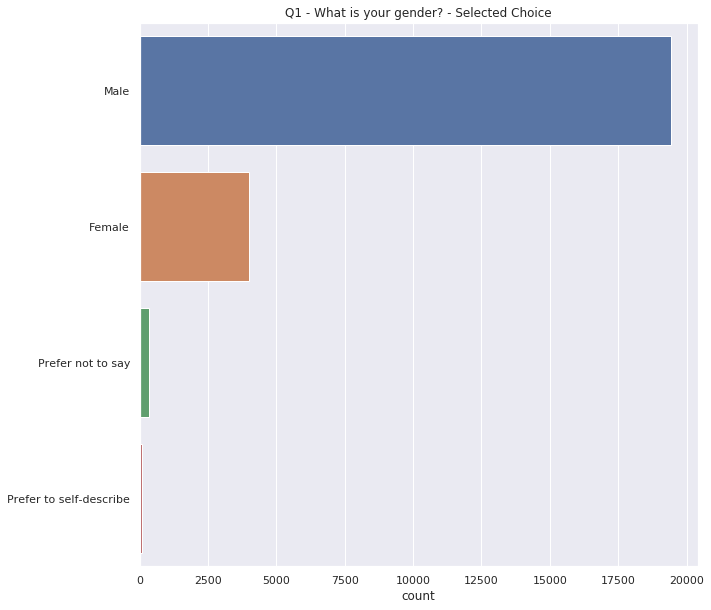

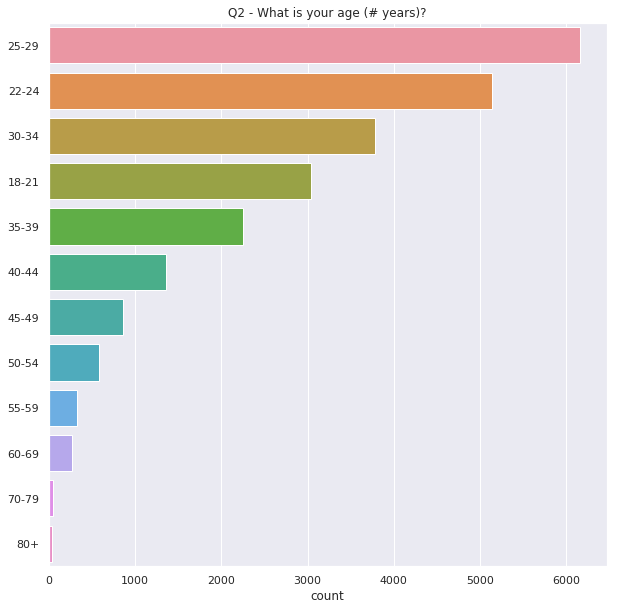

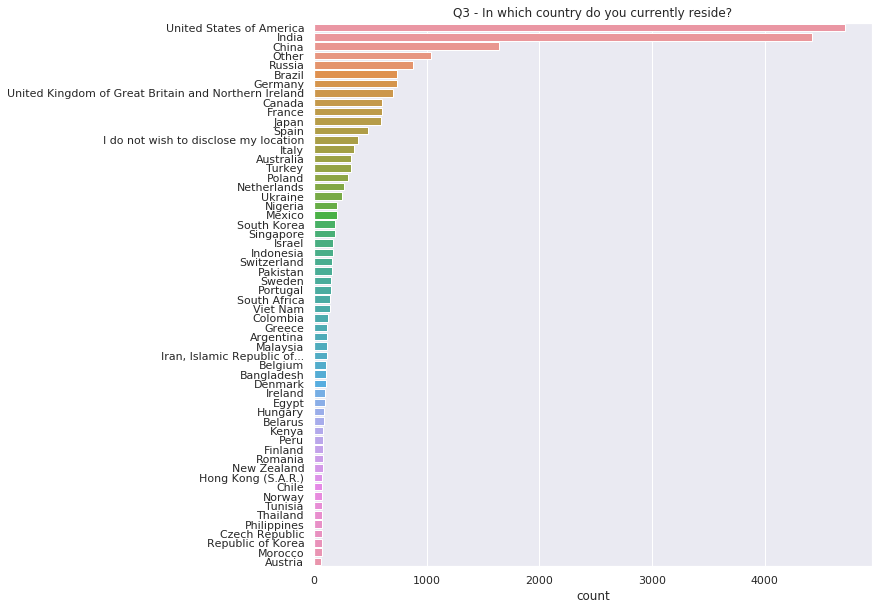

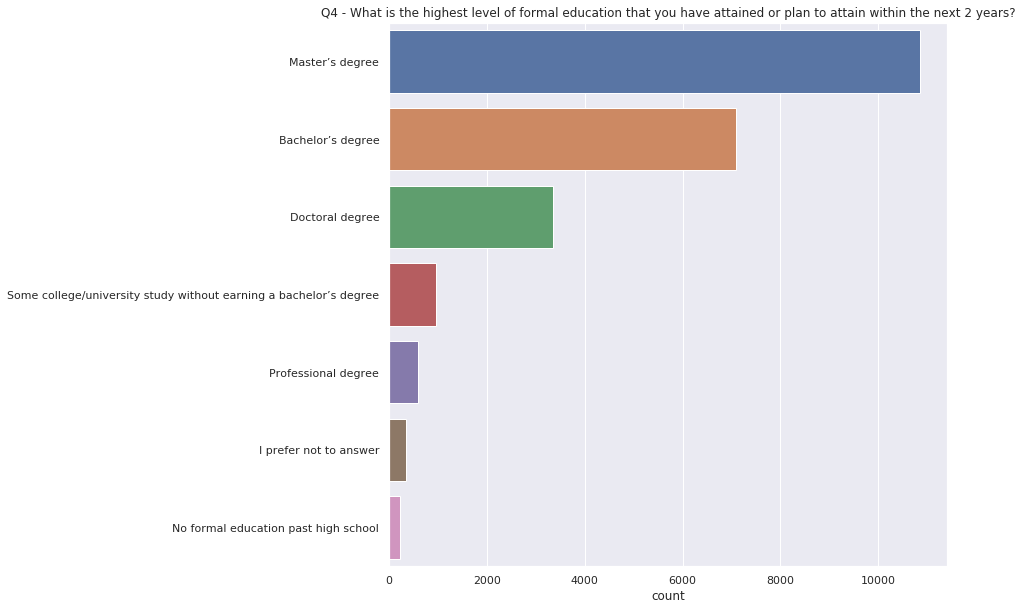

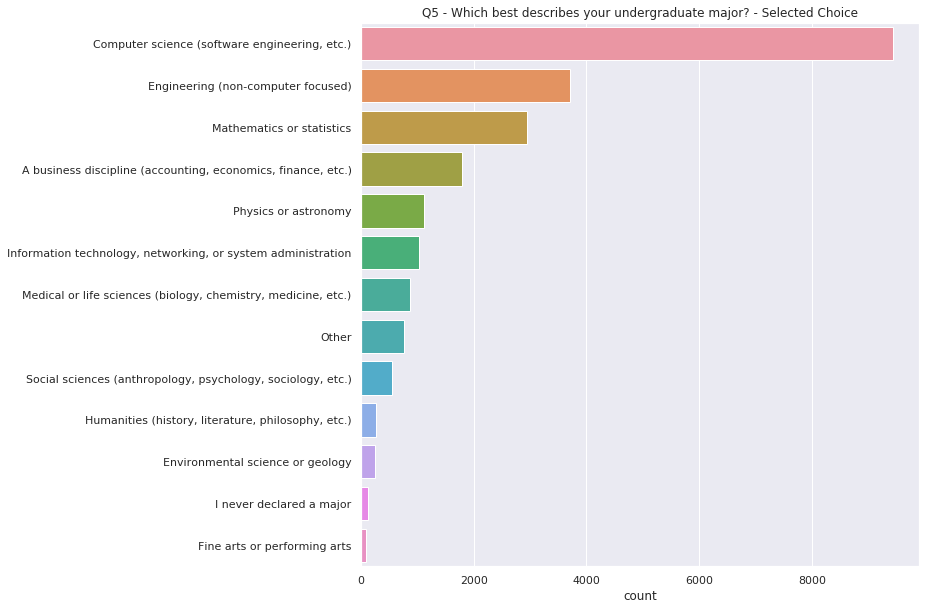

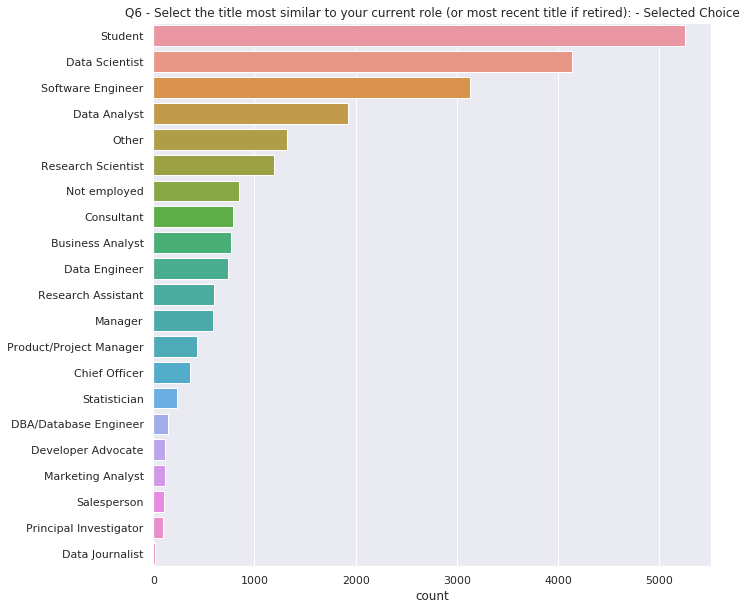

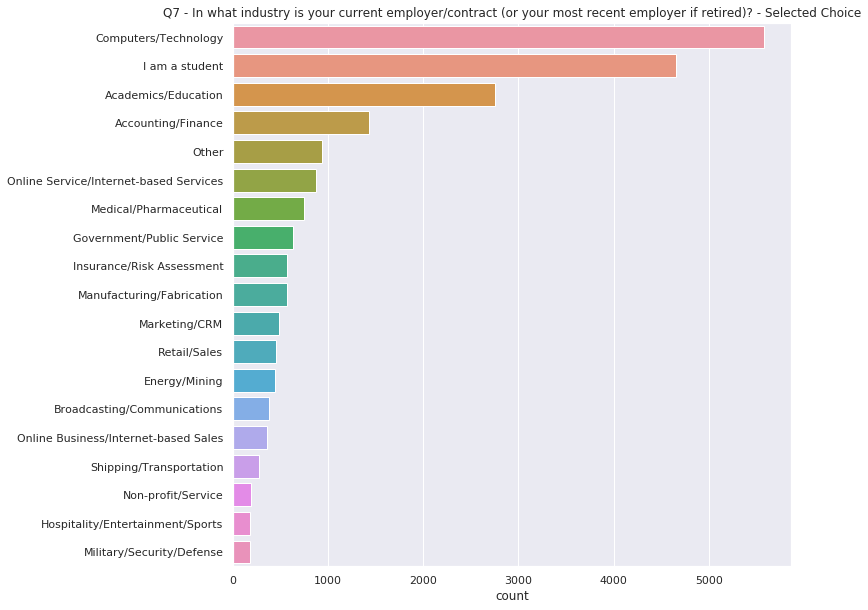

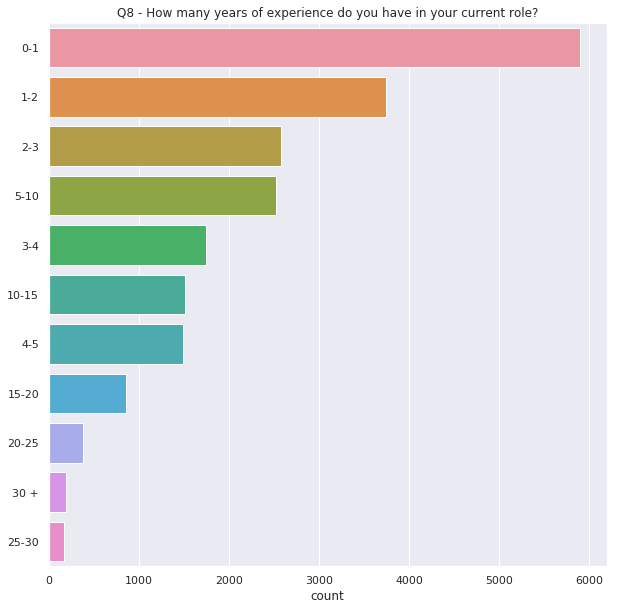

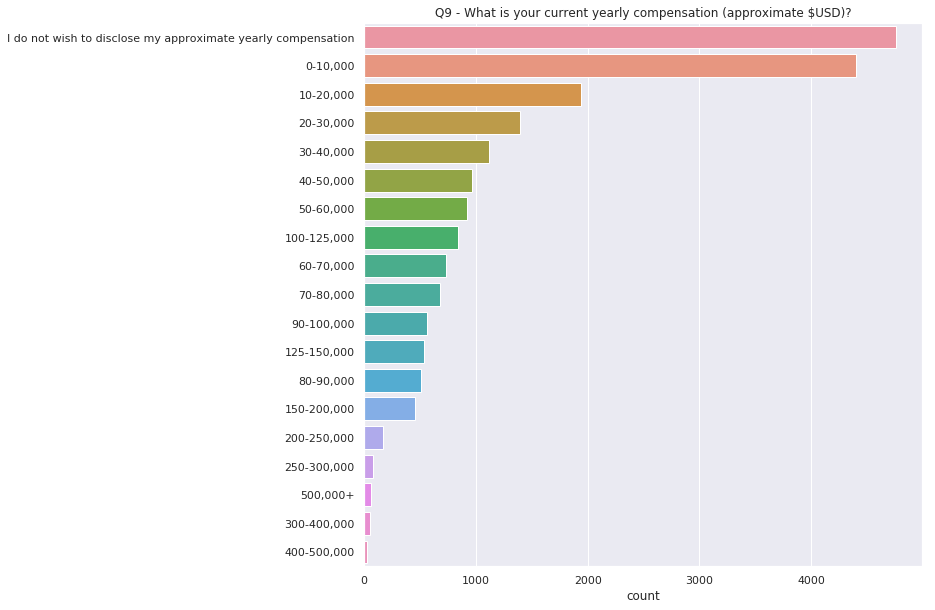

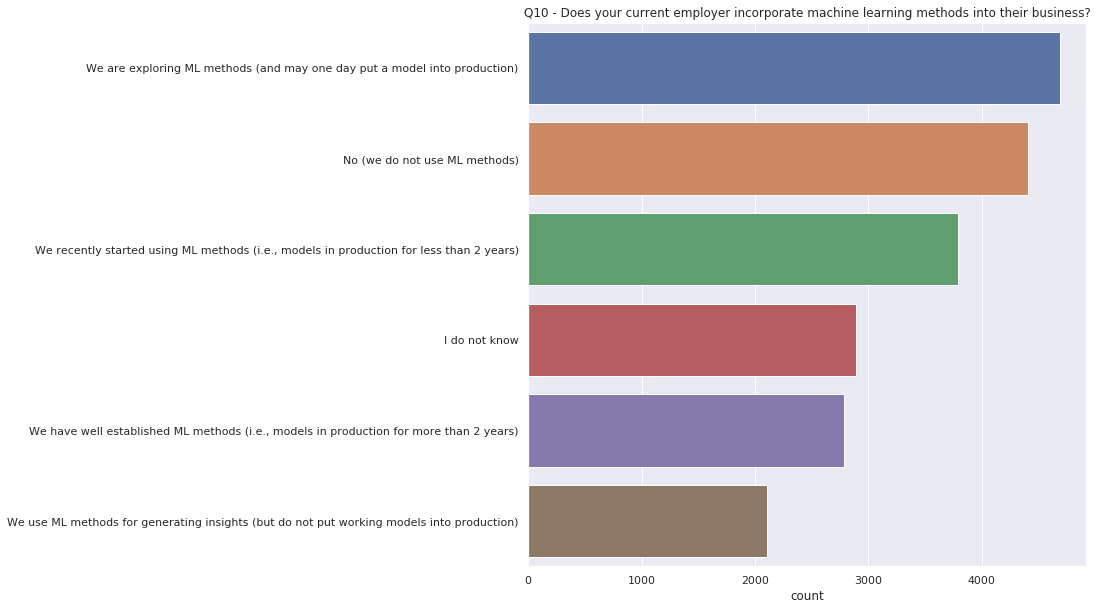

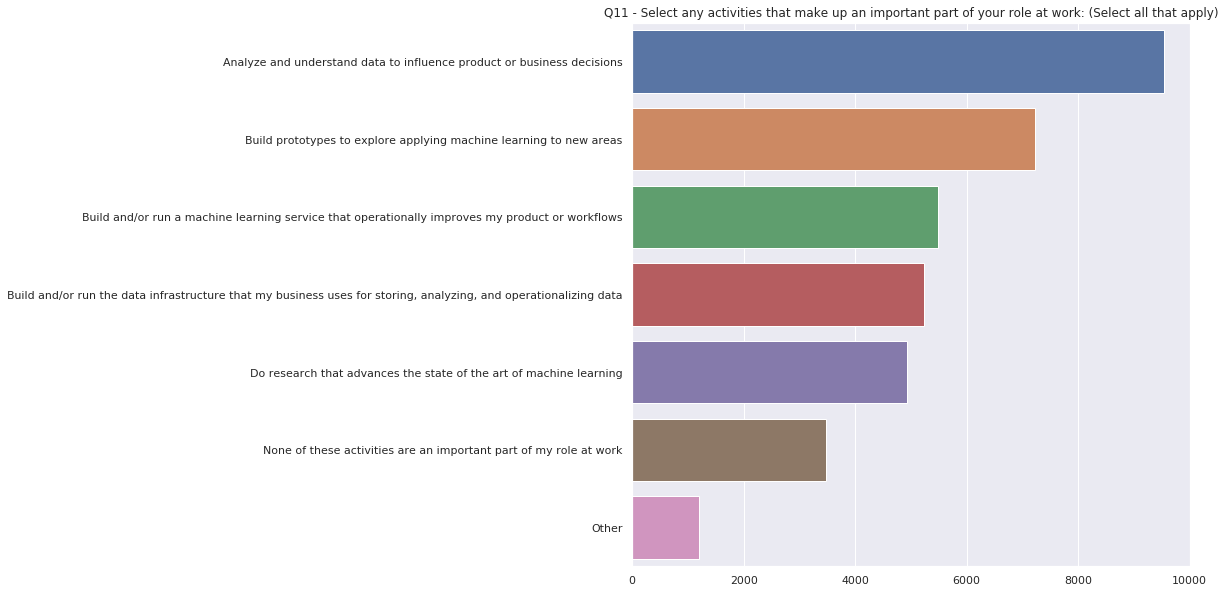

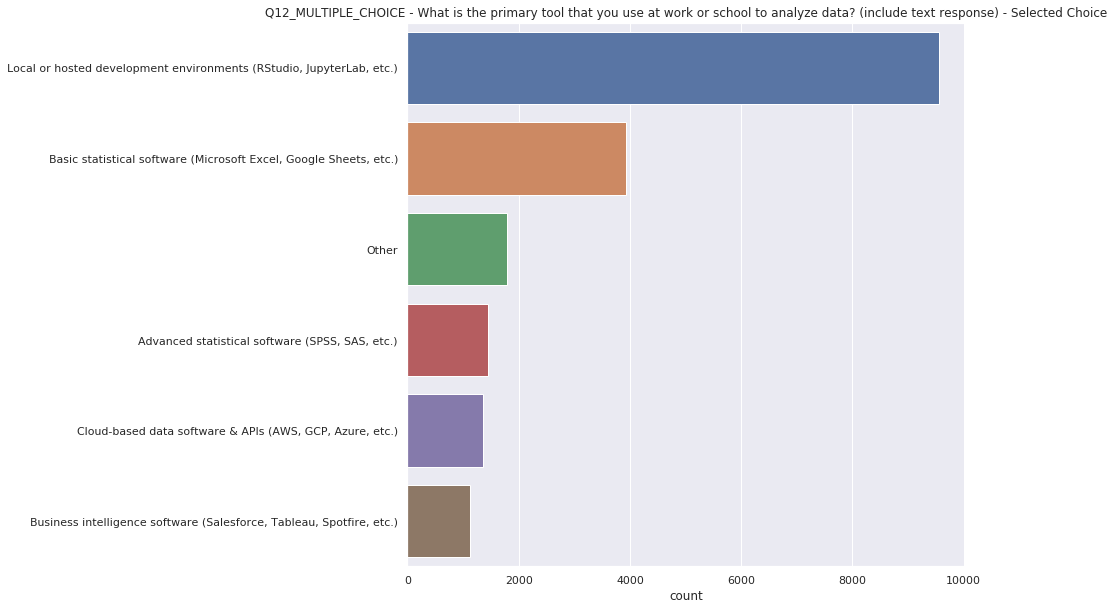

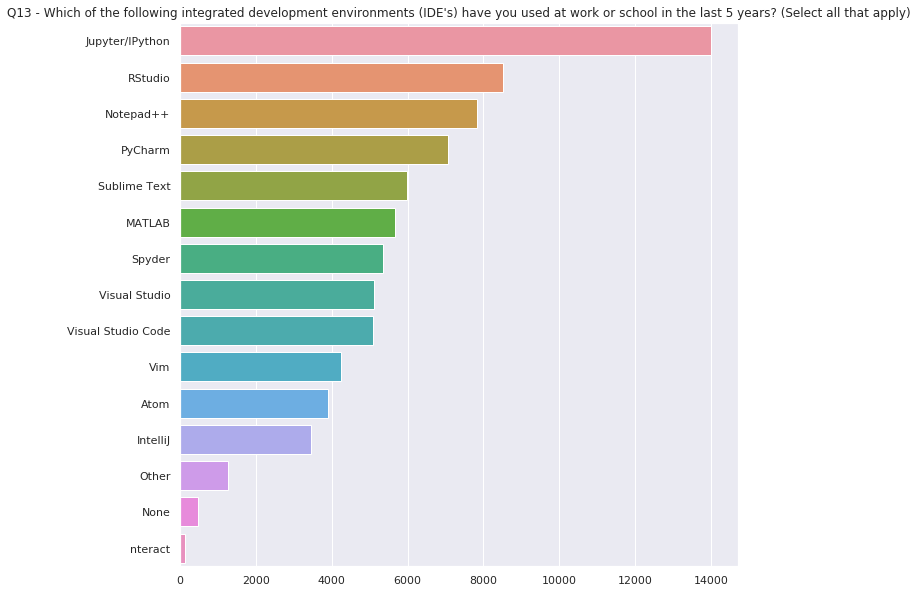

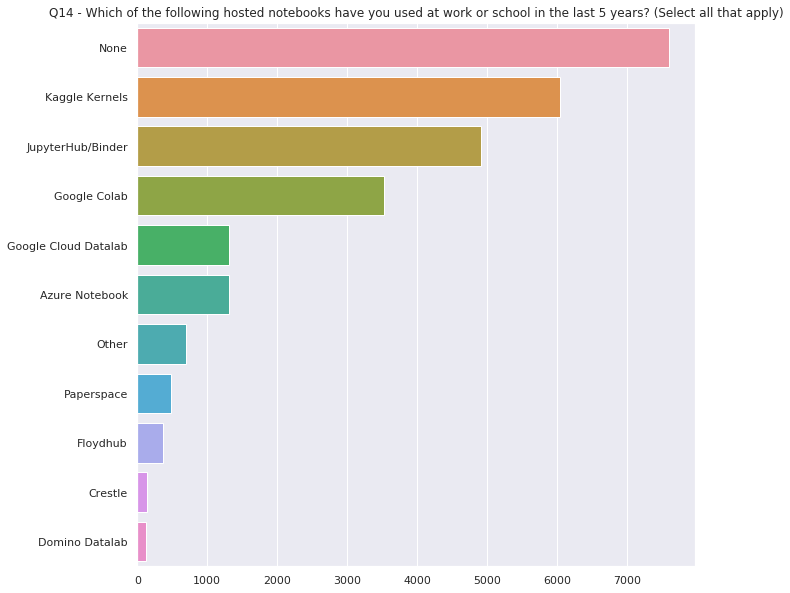

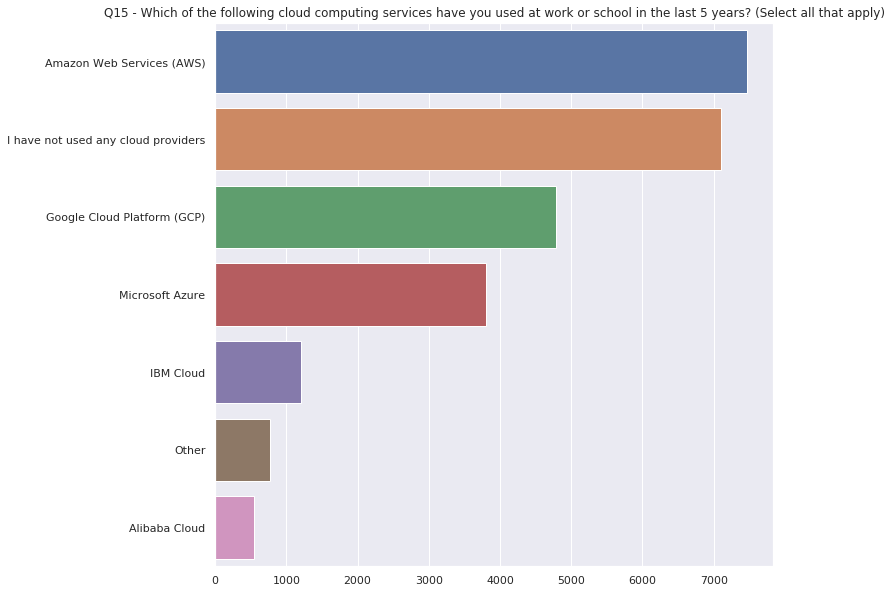

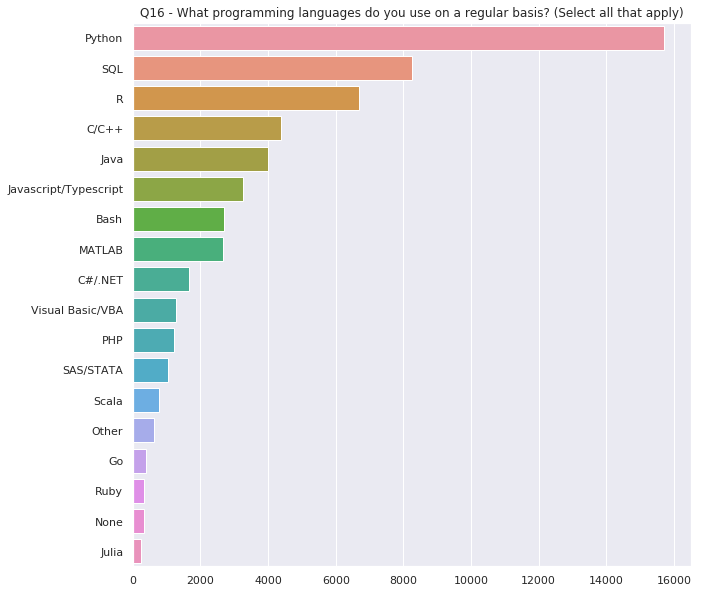

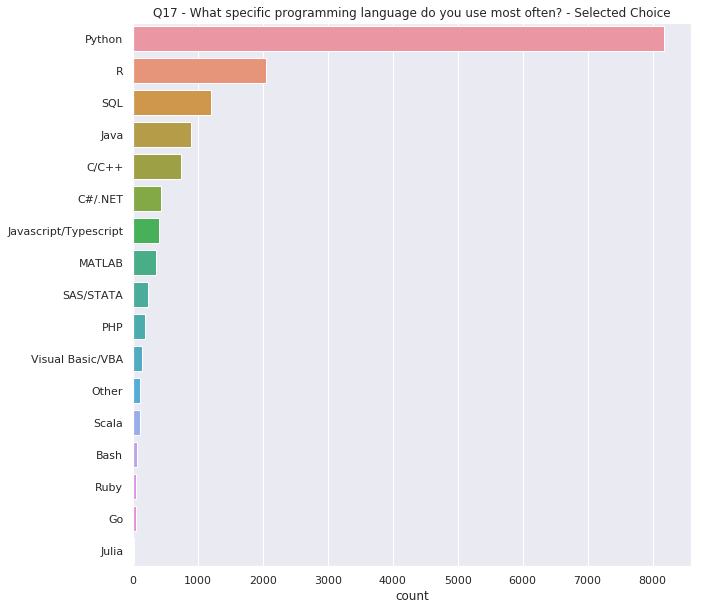

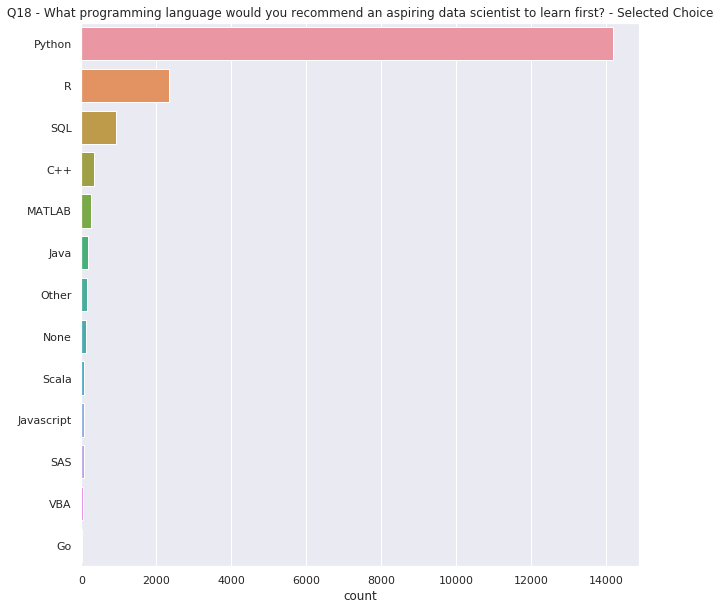

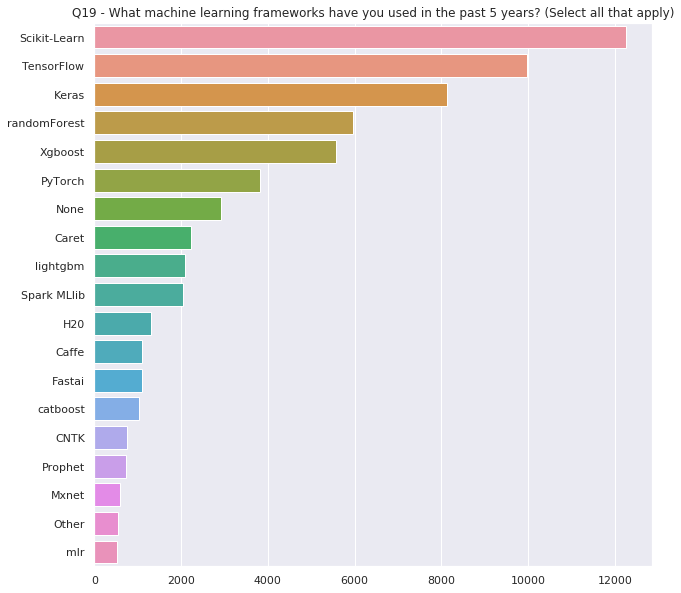

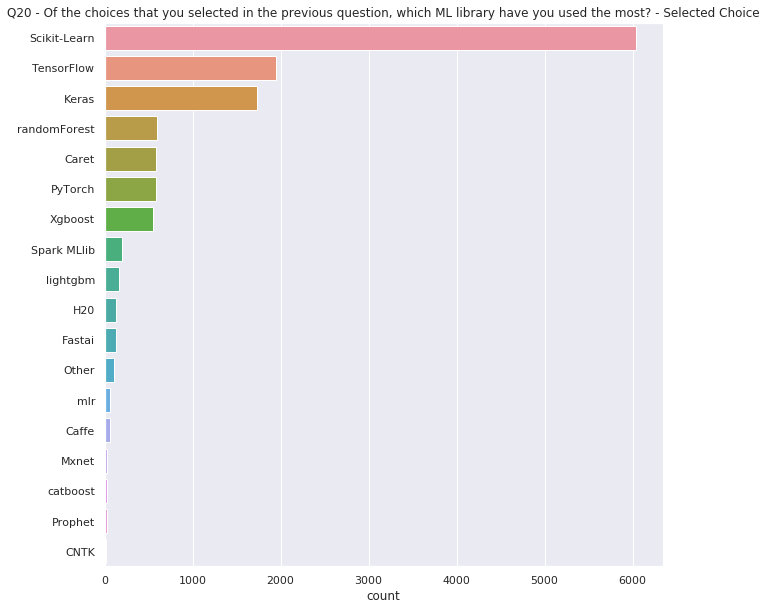

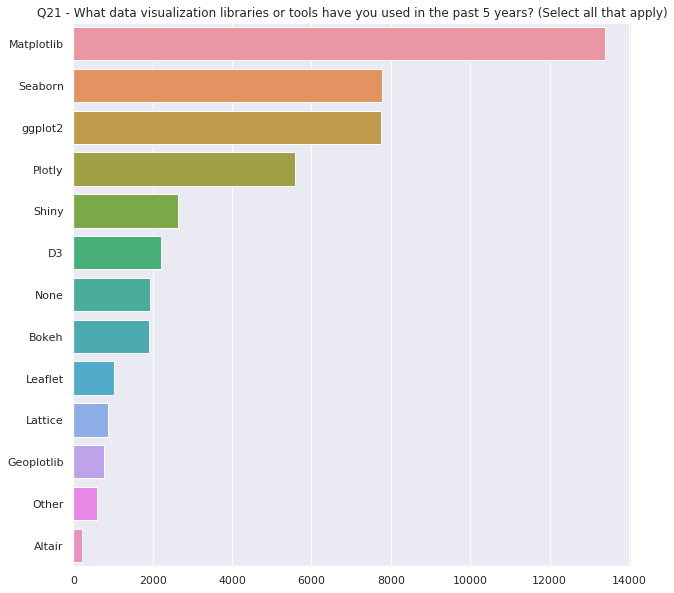

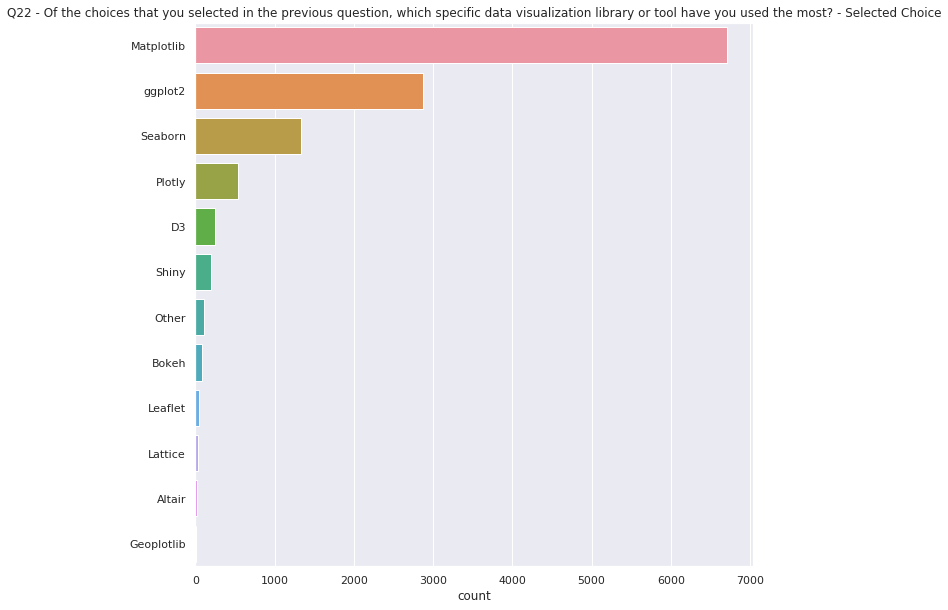

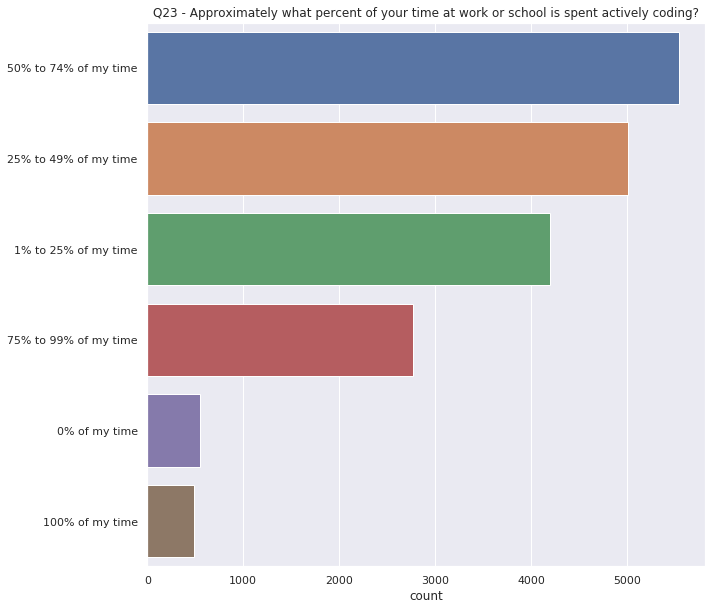

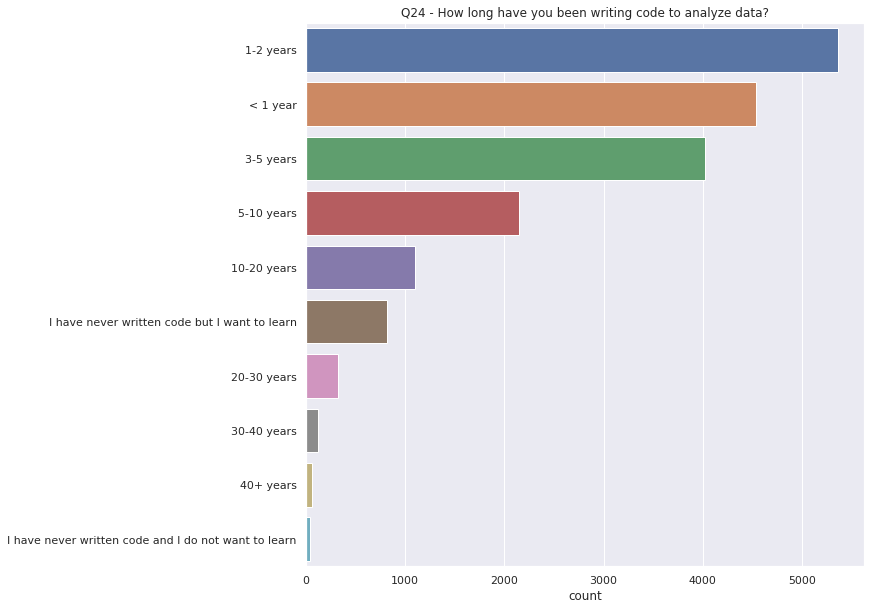

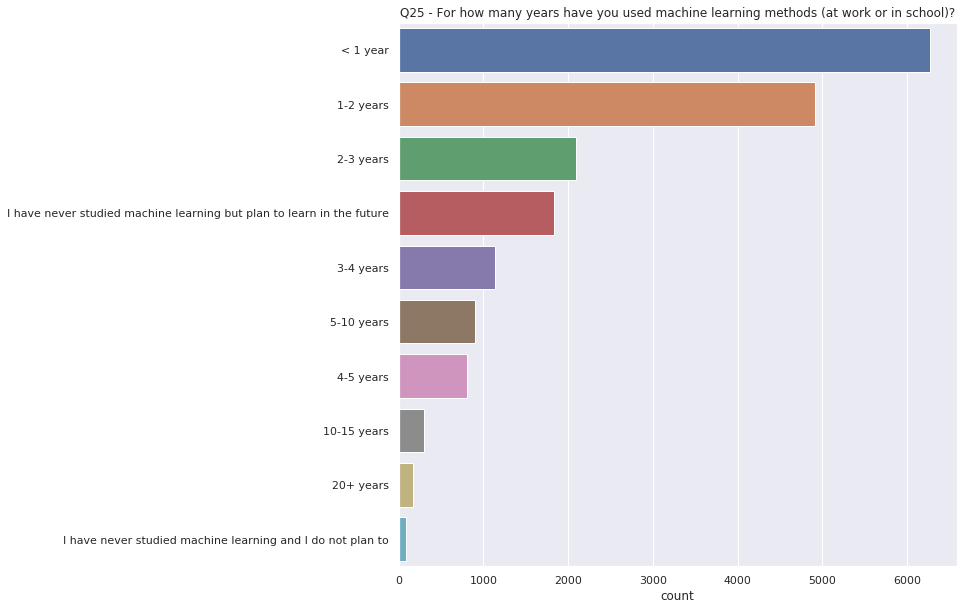

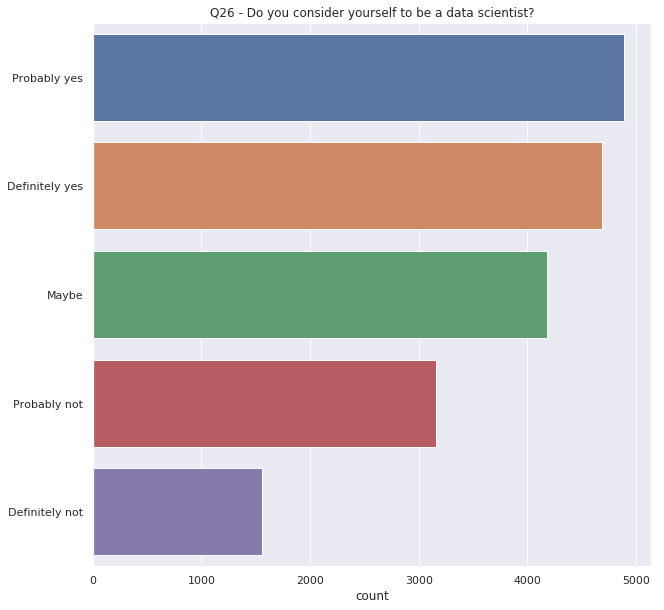

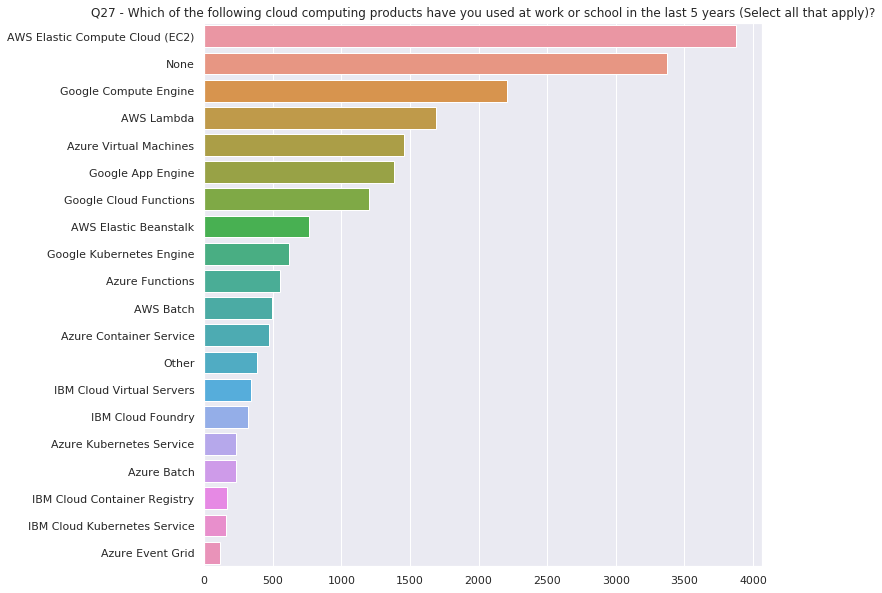

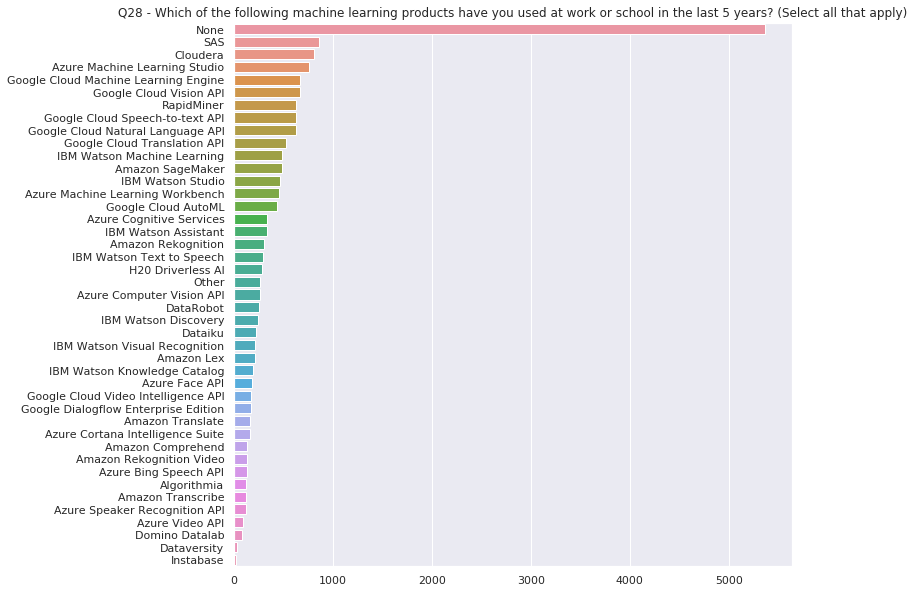

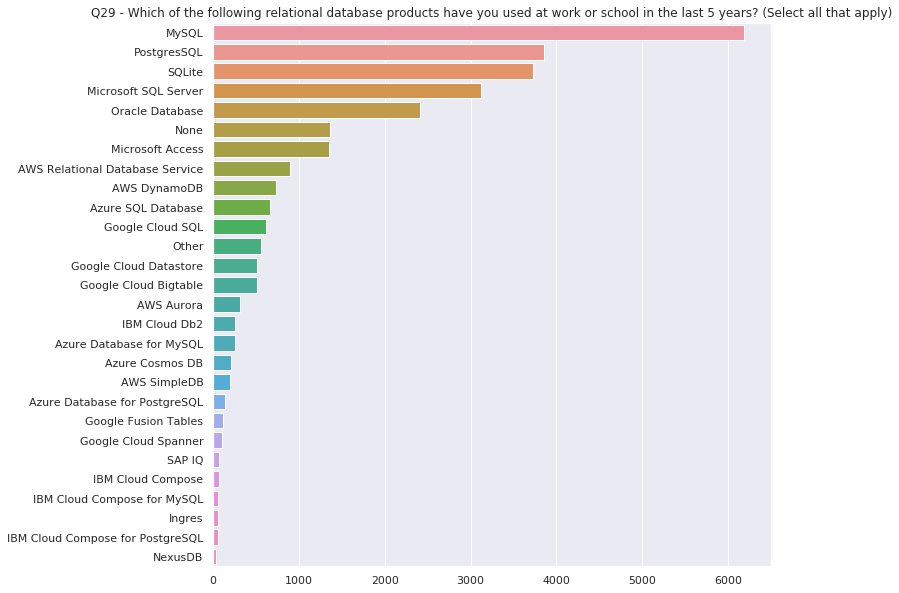

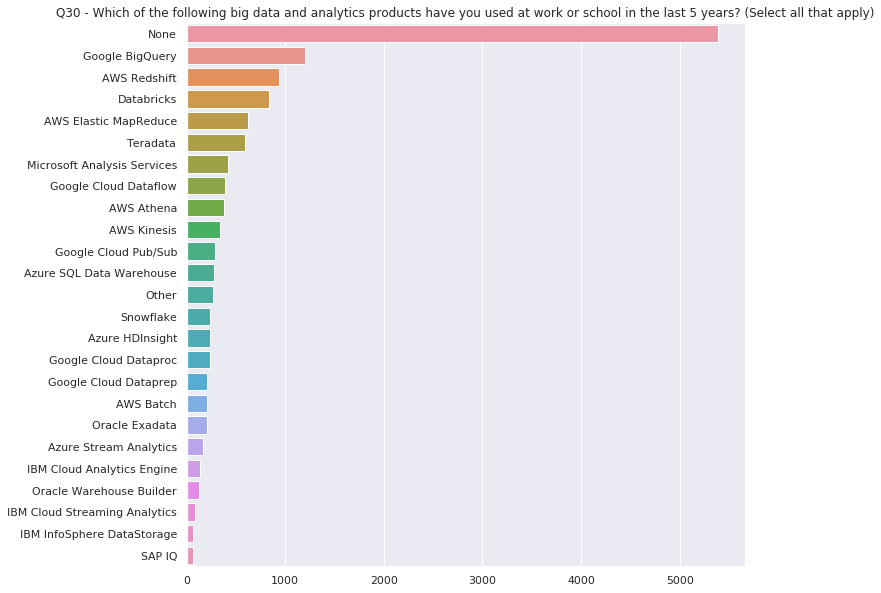

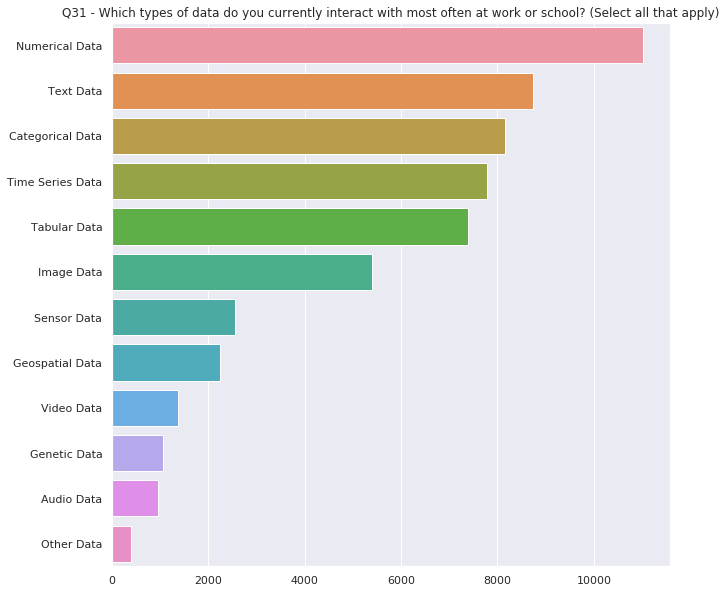

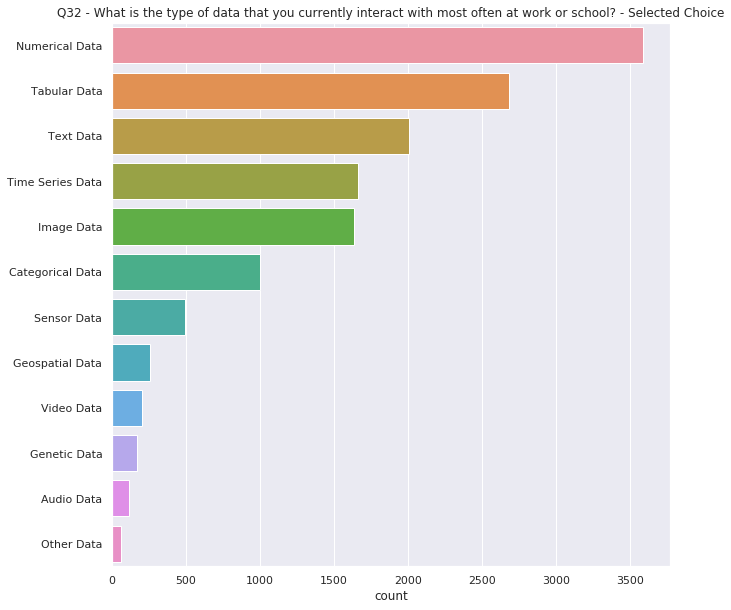

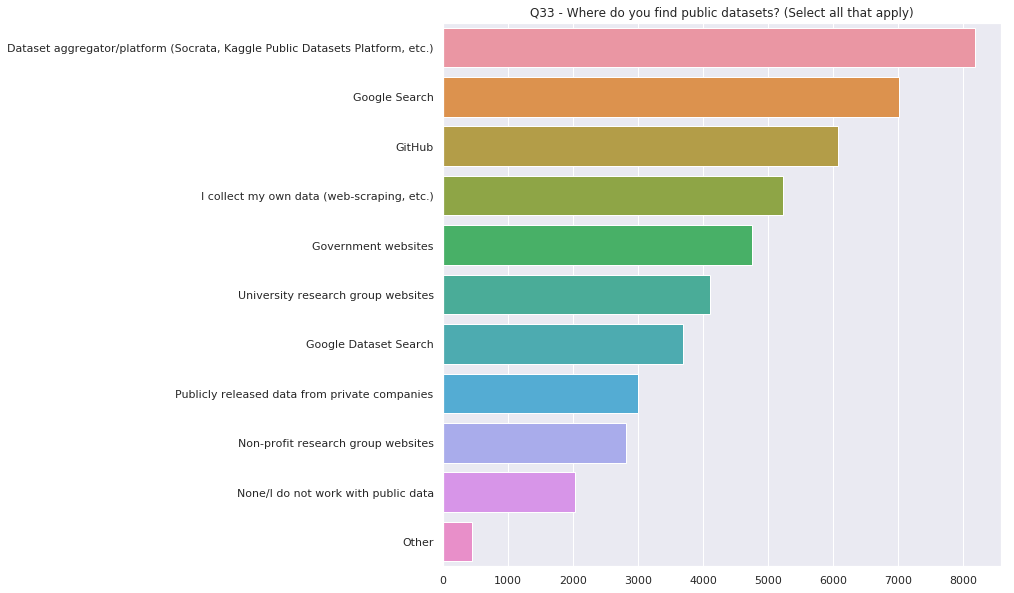

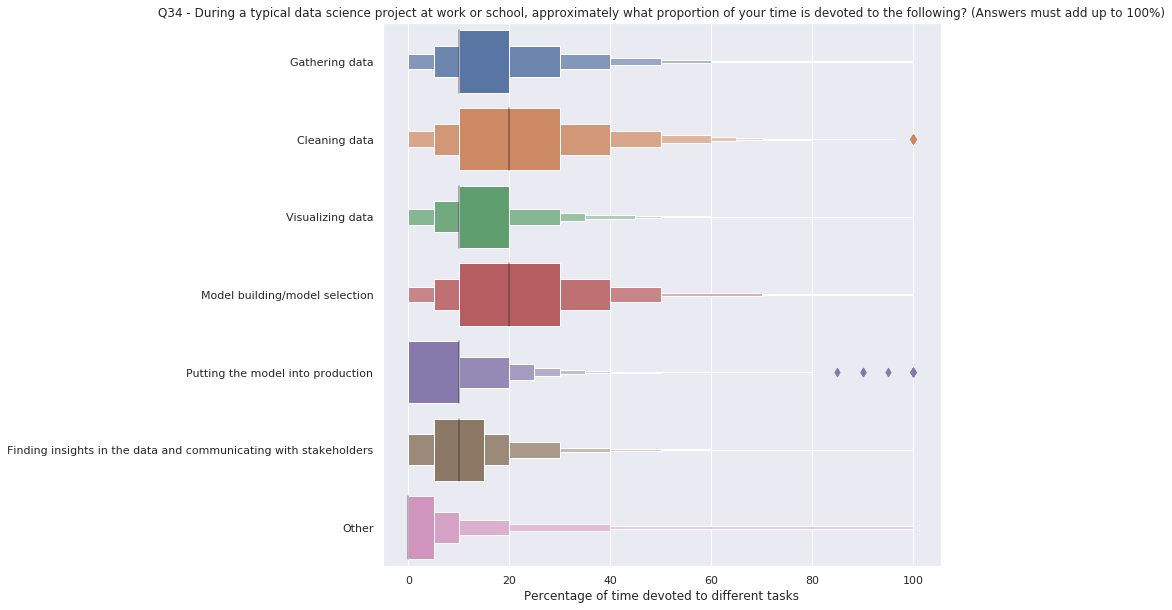

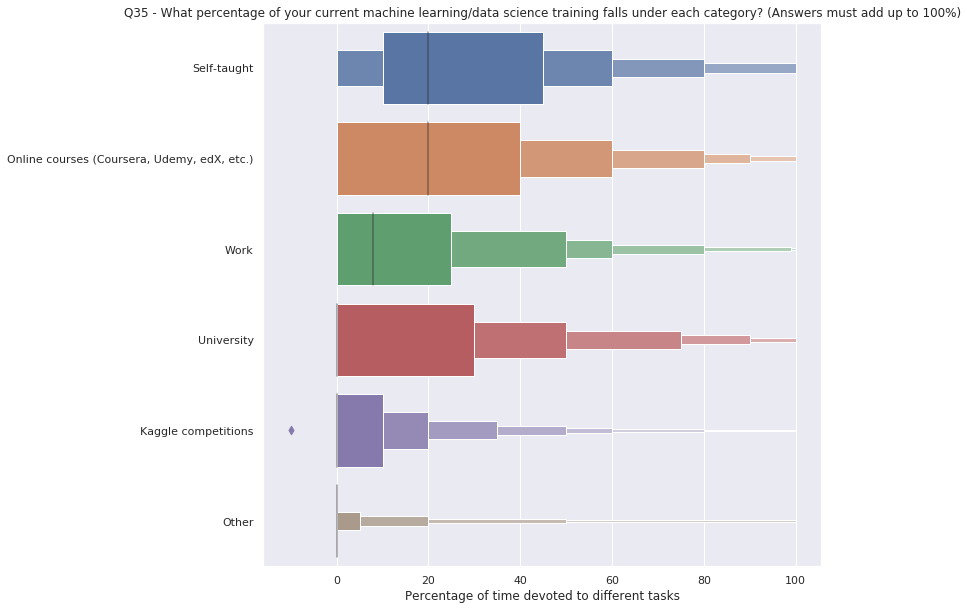

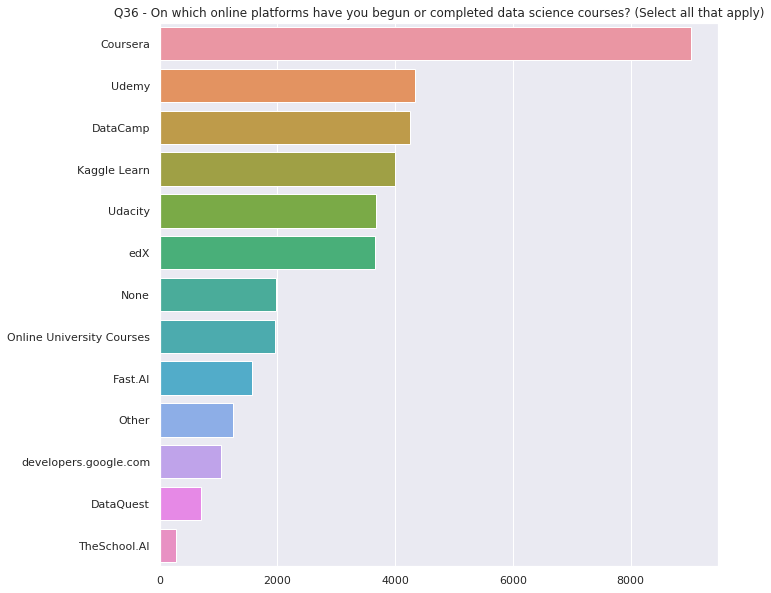

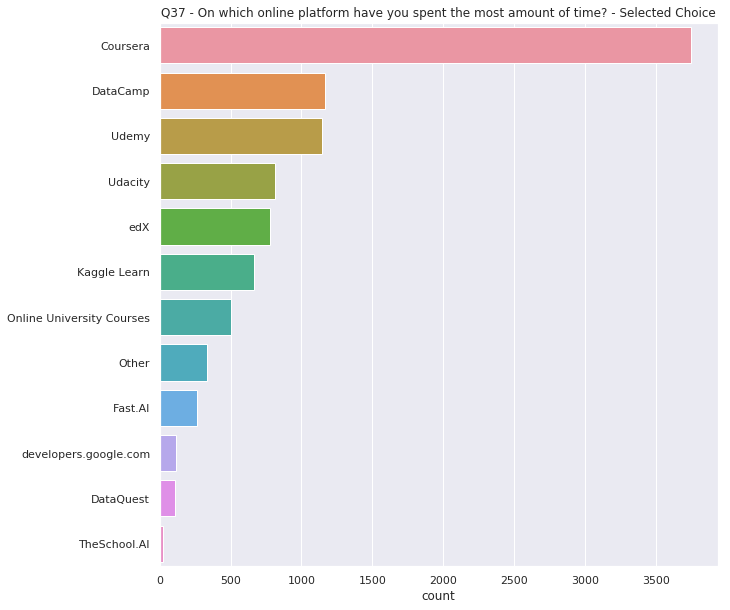

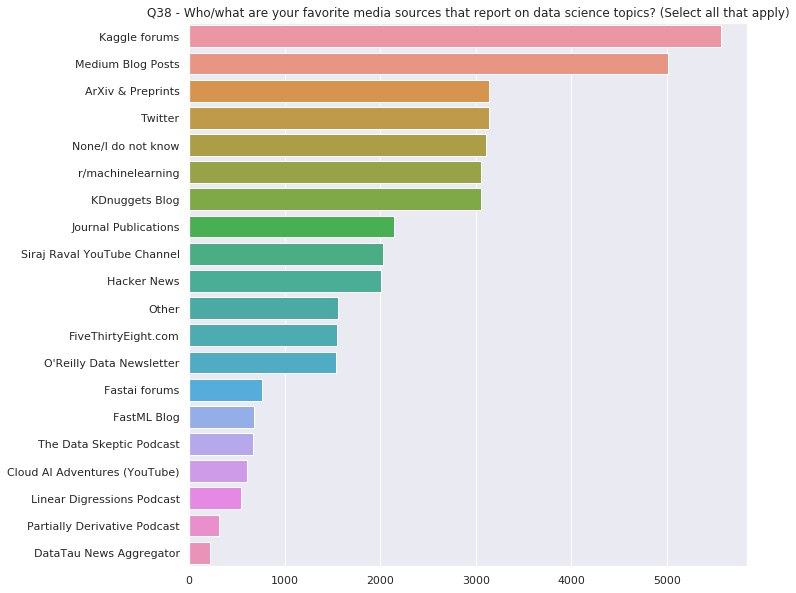

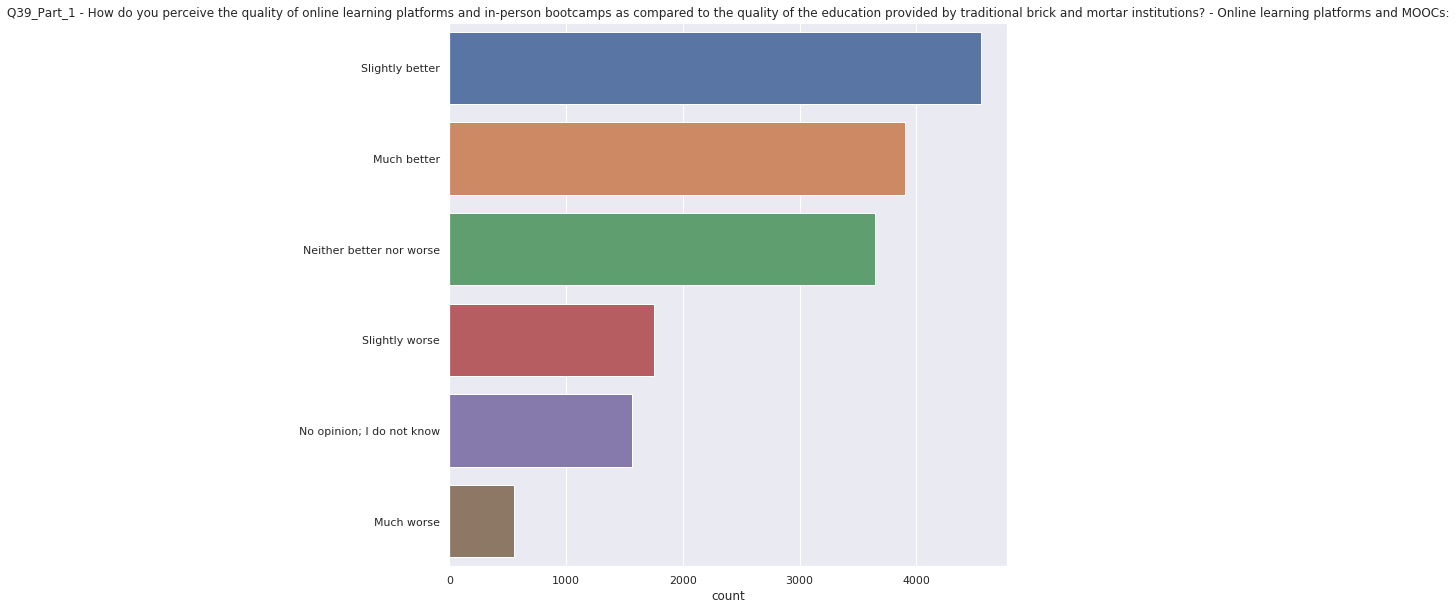

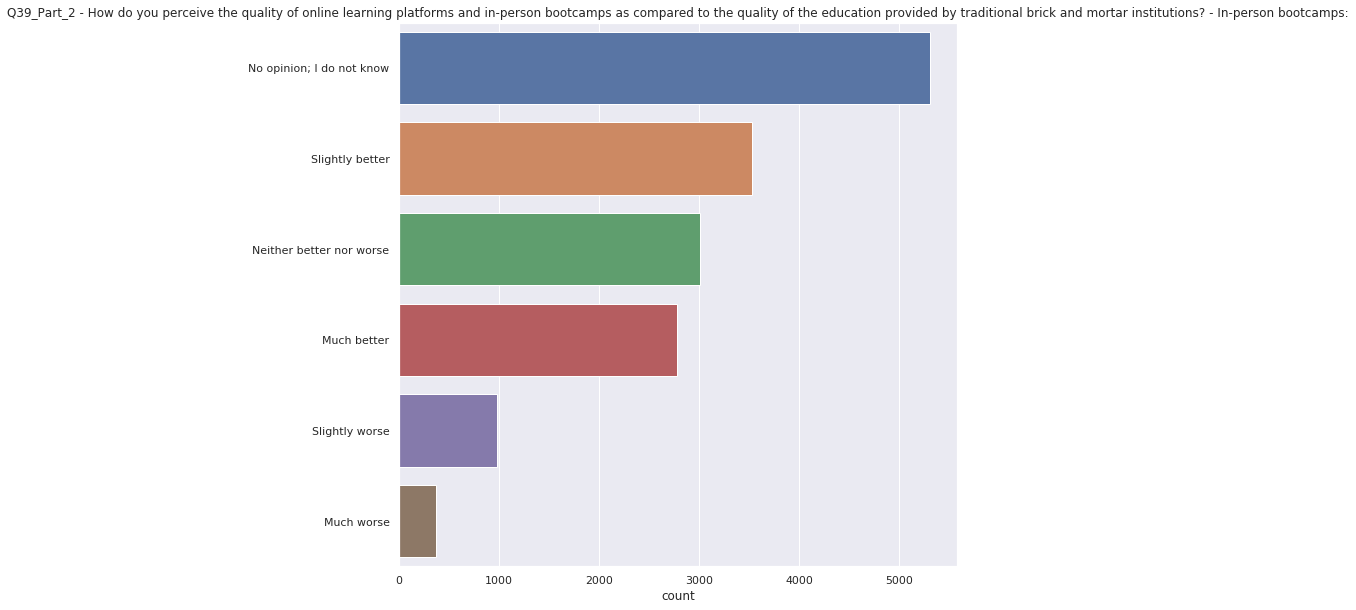

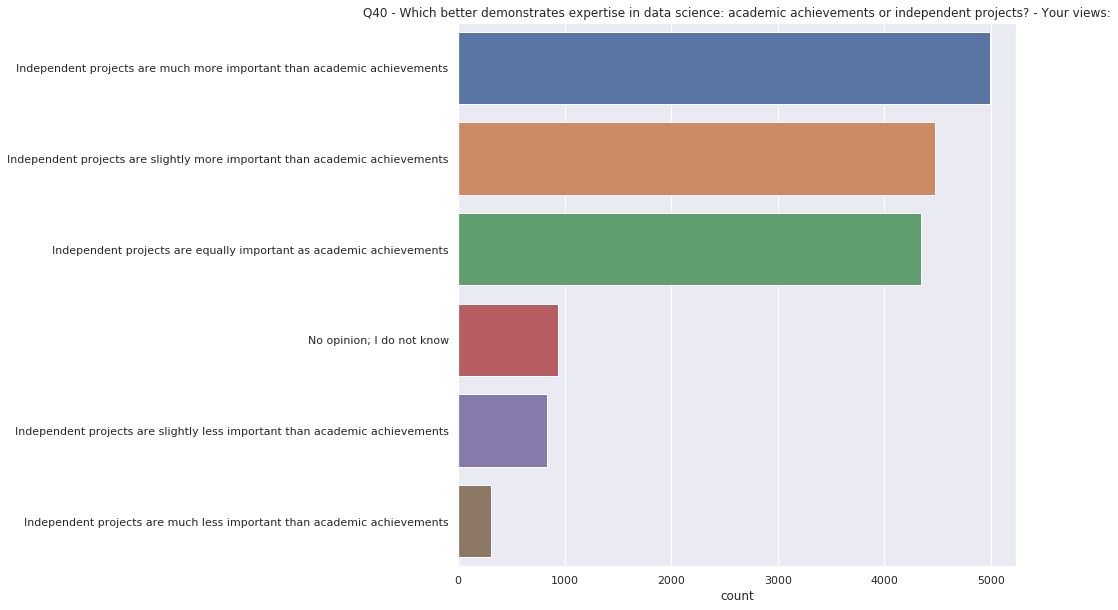

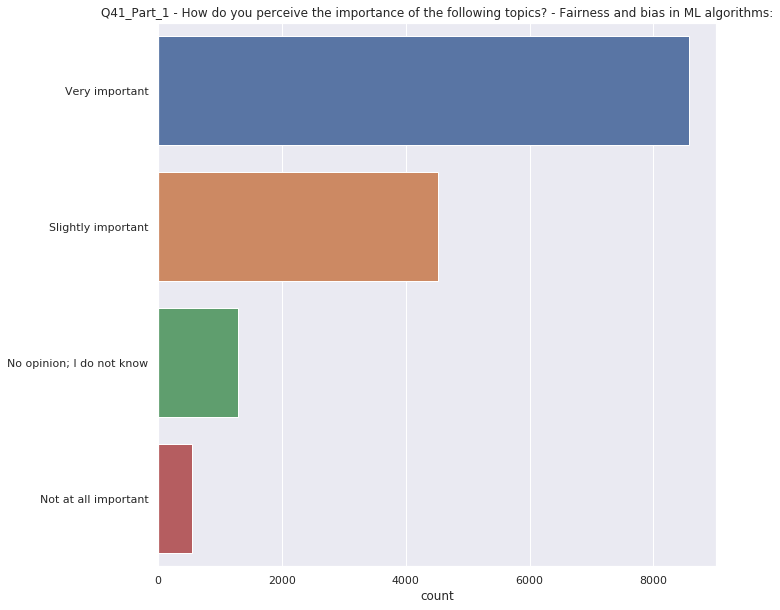

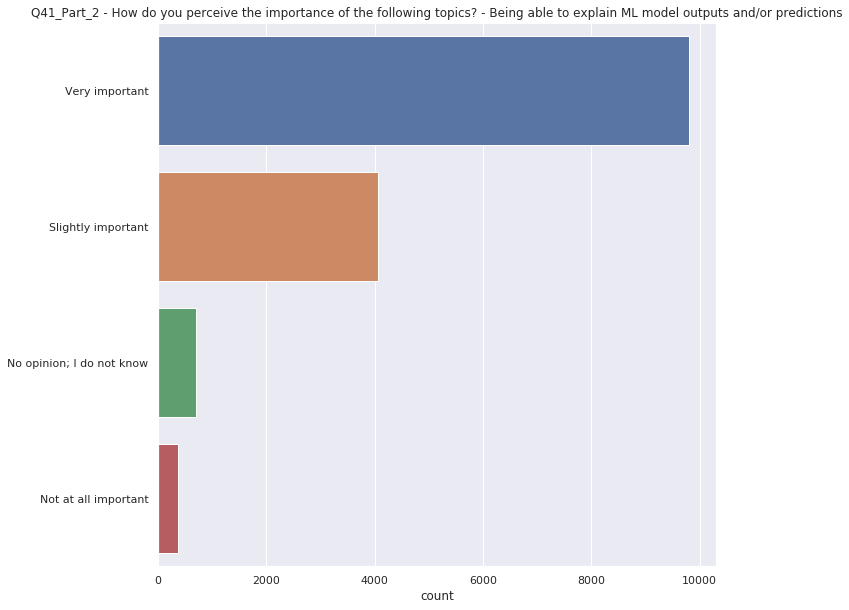

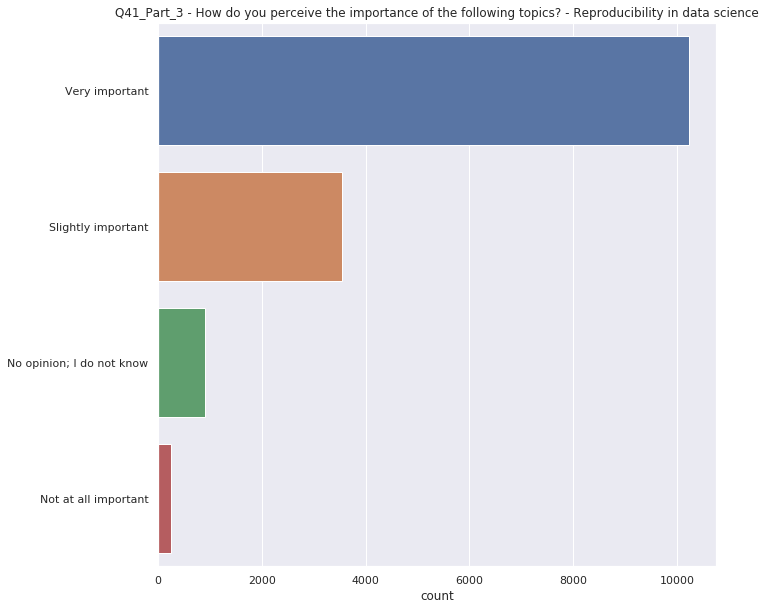

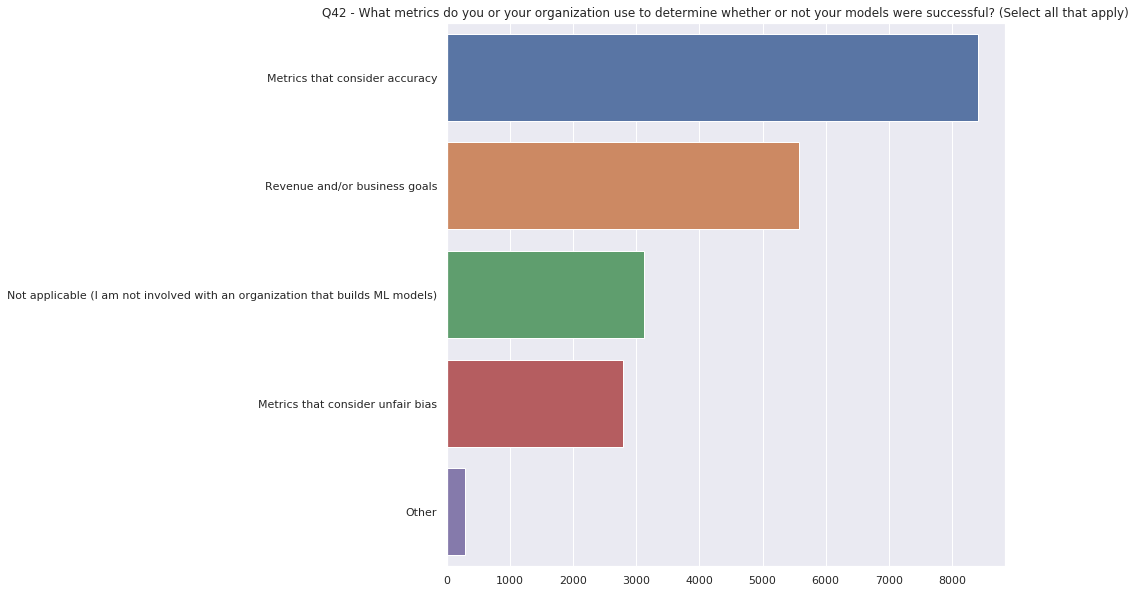

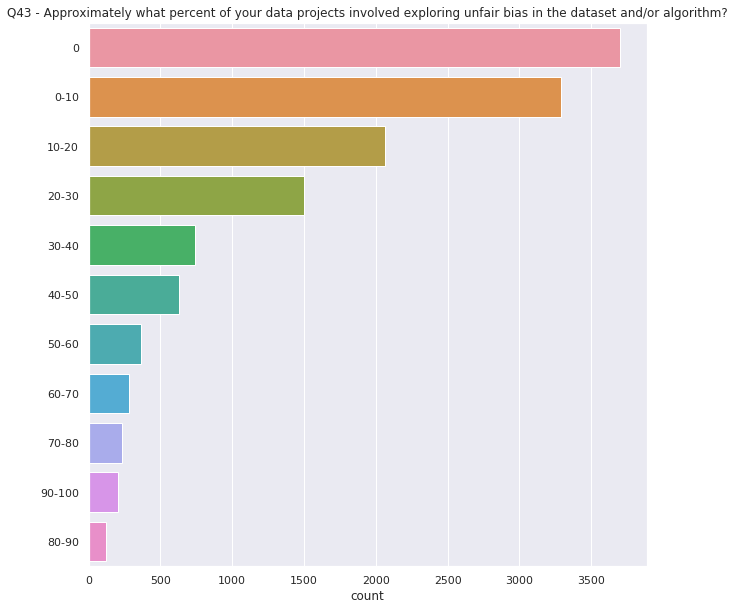

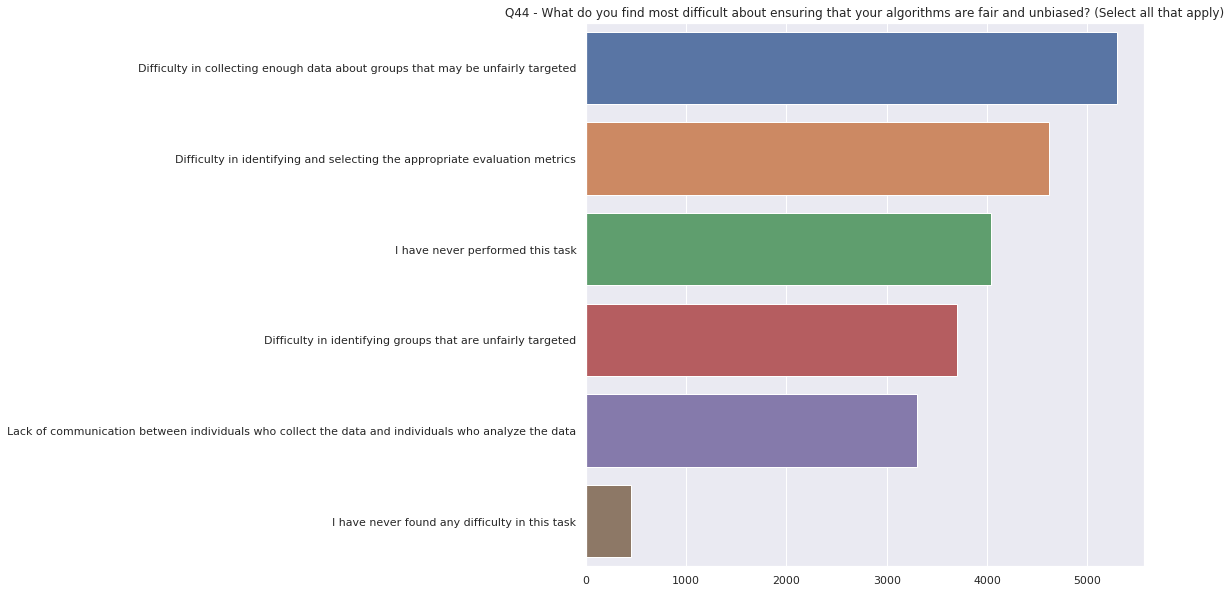

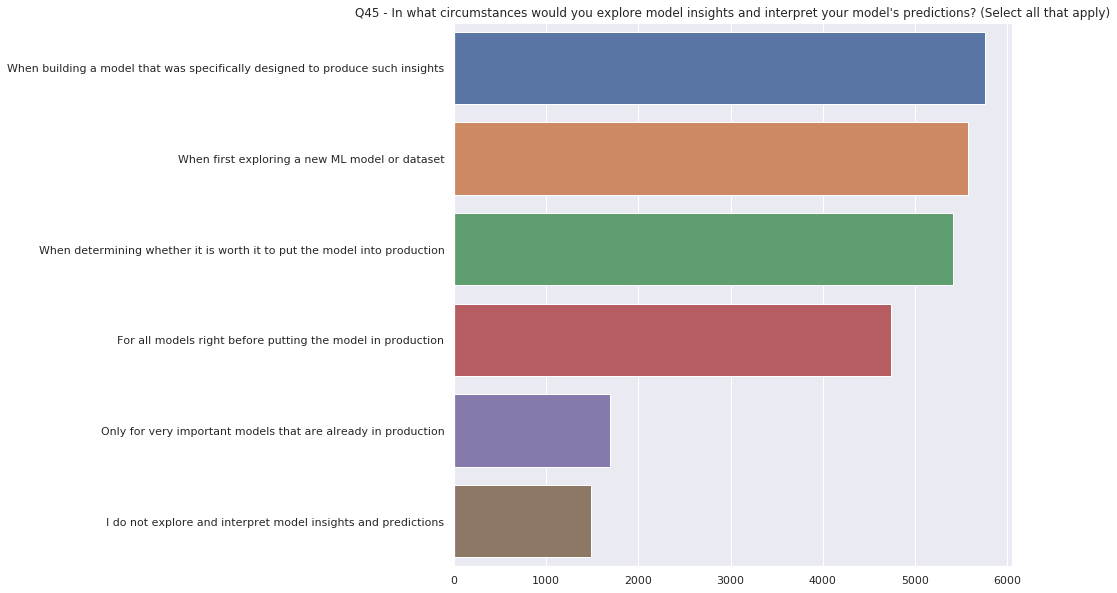

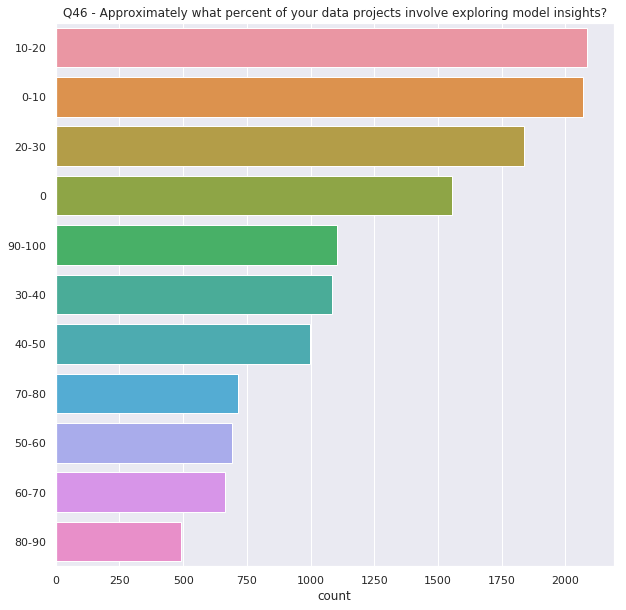

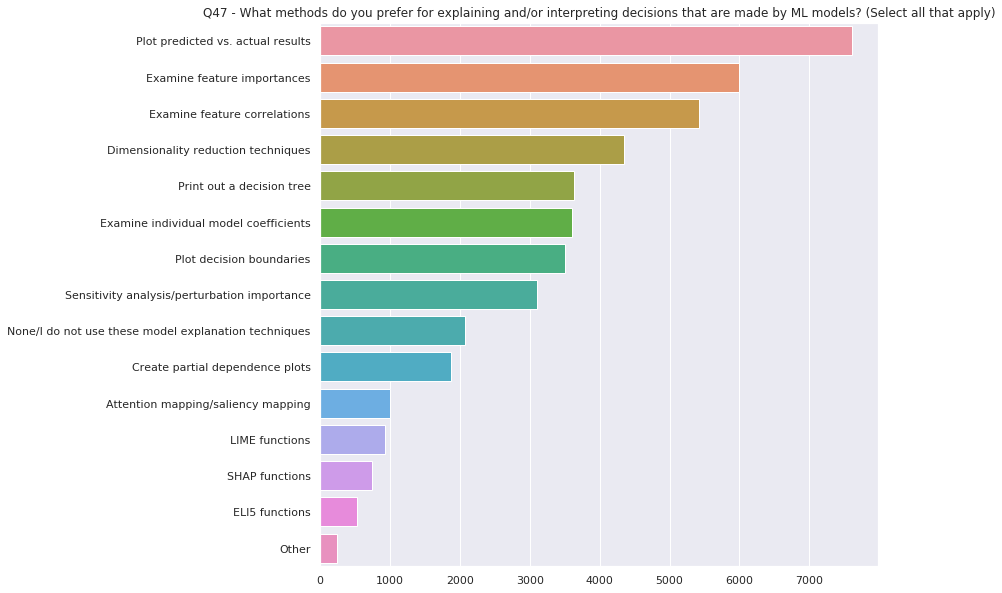

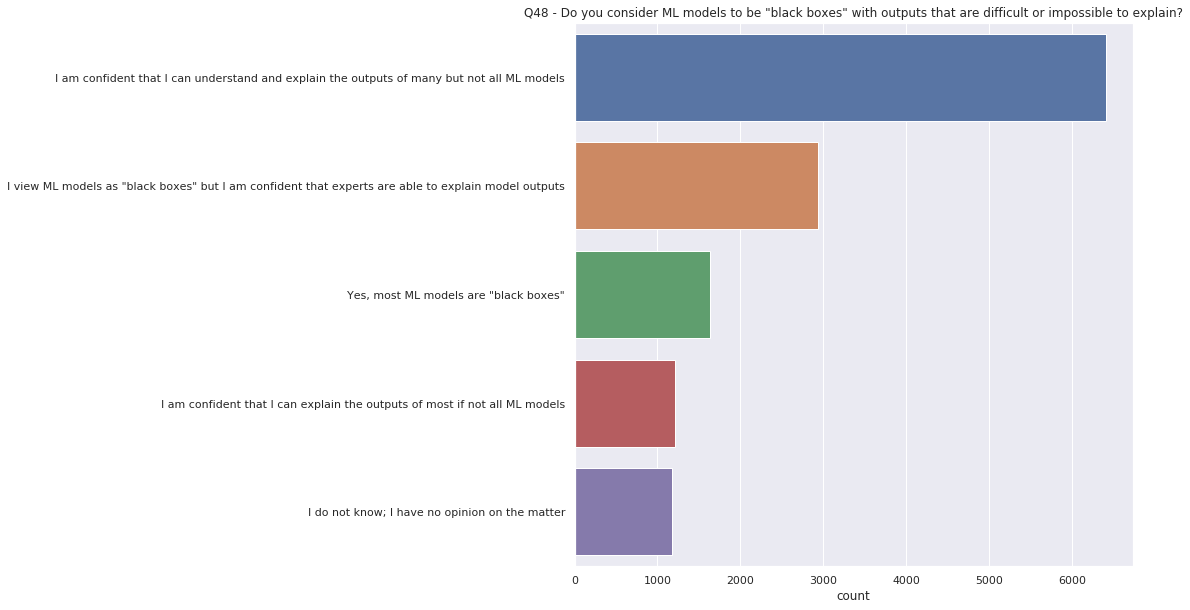

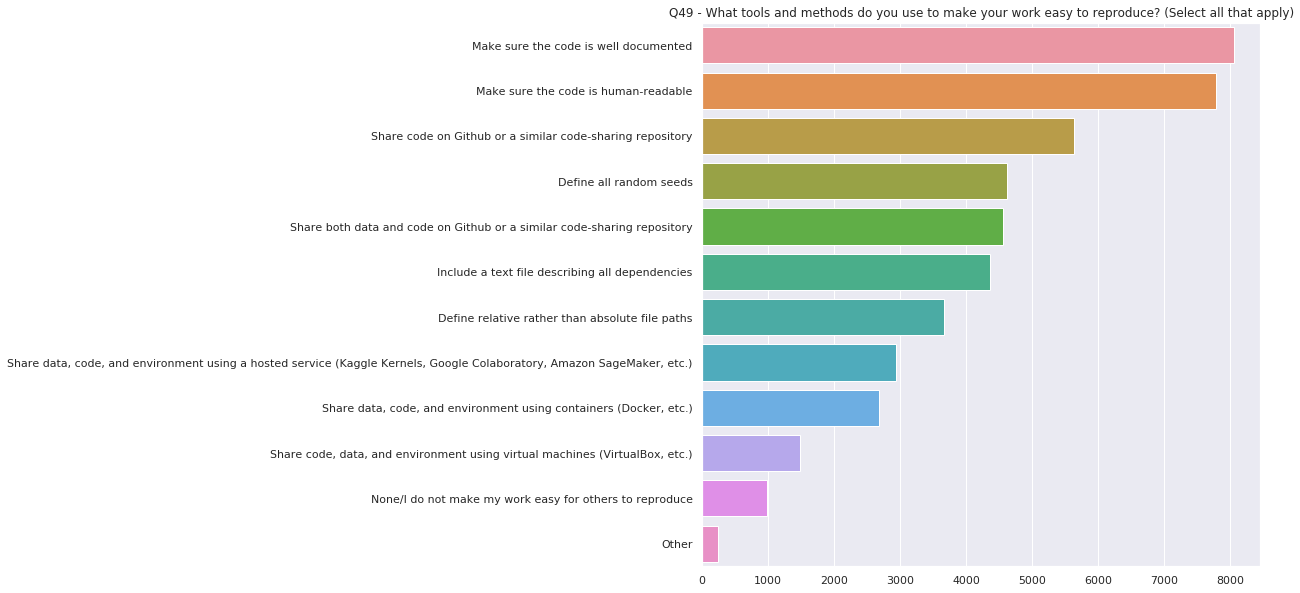

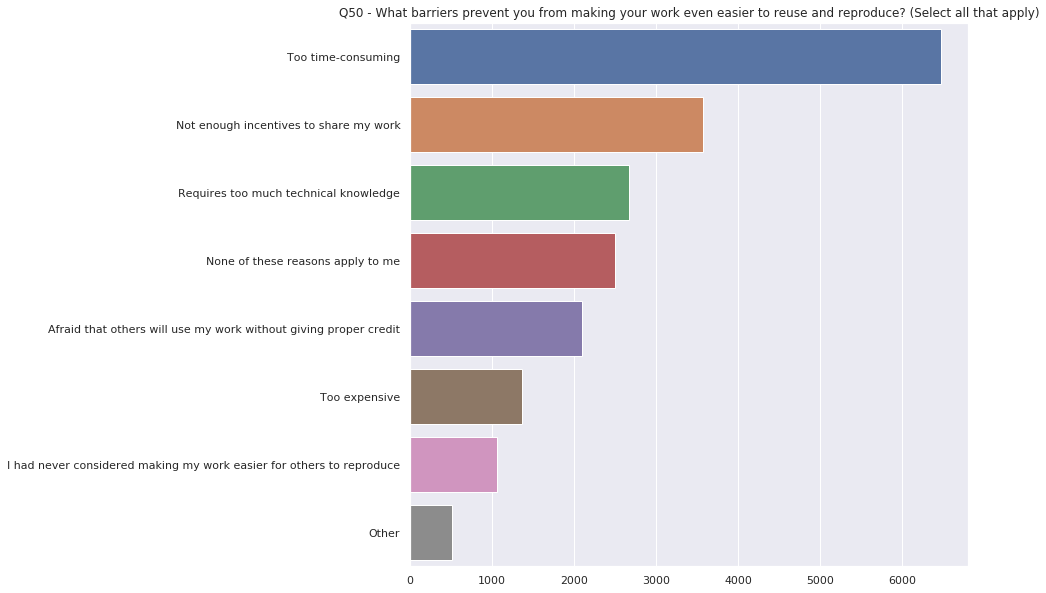

In [34]:
print()
print()
for q in range(1,51):
    
    if q in scc.keys():
        q = 'Q' + str(q)
        q_cols = [col for col in filtered_cols if (col.startswith(q + ' ') or col.startswith(q + '_'))]
        for q_col in q_cols:
            single_col_categorical(q_col)
    
    elif q in mcc.keys():
        q = 'Q' + str(q)
        q_cols = [col for col in filtered_cols if (col.startswith(q + ' ') or col.startswith(q + '_'))]
        multi_col_categorical(q, q_cols)
    
    elif q in mcn.keys():
        q = 'Q' + str(q)
        q_cols = [col for col in mult_chce_resp if (col.startswith(q + ' ') or col.startswith(q + '_'))]
        multi_col_numerical(q, q_cols)

_______________________________________________
## 5. Feature Engineering

In [35]:
# Create a dataframe to hold features for running supervised learning models
feats_df = pd.DataFrame()

# Add Question 34 columns to the 'feats_df' dataframe
feats_df = pd.concat([feats_df, q34_df], axis=1)

# Add Question 35 columns to the 'feats_df' dataframe
feats_df = pd.concat([feats_df, q35_df], axis=1)

# Fill null values in multiple-choice columns with 0s, convert the columns to booleans, and then
# convert the columns to integers (1 or 0); similar to one-hot encoding
for q, cols in mcc.items():
    for col in cols:
        feats_df[col] = mult_chce_resp[col].fillna(0).astype(bool).astype(int)

In [36]:
# Create an initial dataframe to use with the fastai.tabular module.
# Single-choice categorical columns may need to be handled from within 
# the fastai.tabular module as opposed to one-hot encoding them beforehand
feats_df_for_nn = feats_df.copy()

In [37]:
# Replace null values in single-choice categorical columns with 'No Answer'
# One-hot encode those columns for the 'feats_df' dataframe
# Do not one-hot encode them for the 'feats_df_for_nn' dataframe
for q, cols in scc.items():
    if q != 9:
        feats_df = pd.concat([feats_df, pd.get_dummies(mult_chce_resp[cols].fillna('No Answer'))], axis=1)
        feats_df_for_nn = pd.concat([feats_df_for_nn, mult_chce_resp[cols].fillna('No Answer')], axis=1)
    elif q == 9:
        feats_df = pd.concat([feats_df, mult_chce_resp[cols]], axis=1)
        feats_df_for_nn = pd.concat([feats_df_for_nn, mult_chce_resp[cols]], axis=1)

In [38]:
# Preview of the 'feats_df' dataframe
feats_df.head()

Q34_Part_1 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Gathering data  \
1                                                NaN                                                                                                                                              
2                                                NaN                                                                                                                                              
3                                                2.0                                                                                                                                              
4                                               20.0                                                                                                                                              
5                                               10.0                                                                                                                                              

   Q34_Part_2 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Cleaning data  \
1                                                NaN                                                                                                                                             
2                                                NaN                                                                                                                                             
3                                                3.0                                                                                                                                             
4                                               25.0                                                                                                                                             
5                                               10.0                                                                                                                                             

   Q34_Part_3 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data  \
1                                                NaN                                                                                                                                                
2                                                NaN                                                                                                                                                
3                                               20.0                                                                                                                                                
4                                               15.0                                                                                                                                                
5                                               20.0                                                                                                                                                

   Q34_Part_4 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection  \
1                                                NaN                                                                                                                                                              
2                                                NaN          

In [39]:
# Preview of the 'feats_df_for_nn' dataframe
feats_df_for_nn.head()

Q34_Part_1 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Gathering data  \
1                                                NaN                                                                                                                                              
2                                                NaN                                                                                                                                              
3                                                2.0                                                                                                                                              
4                                               20.0                                                                                                                                              
5                                               10.0                                                                                                                                              

   Q34_Part_2 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Cleaning data  \
1                                                NaN                                                                                                                                             
2                                                NaN                                                                                                                                             
3                                                3.0                                                                                                                                             
4                                               25.0                                                                                                                                             
5                                               10.0                                                                                                                                             

   Q34_Part_3 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Visualizing data  \
1                                                NaN                                                                                                                                                
2                                                NaN                                                                                                                                                
3                                               20.0                                                                                                                                                
4                                               15.0                                                                                                                                                
5                                               20.0                                                                                                                                                

   Q34_Part_4 - During a typical data science project at work or school, approximately what proportion of your time is devoted to the following? (Answers must add up to 100%) - Model building/model selection  \
1                                                NaN                                                                                                                                                              
2                                                NaN          

#### Check the shapes of input dataframes before and after dropping rows with null values 

In [40]:
feats_df.shape

(23859, 683)

In [41]:
feats_df_for_nn.shape

(23859, 357)

In [42]:
len(feats_df.dropna())

14576

In [43]:
len(feats_df_for_nn.dropna())

14576

#### Build DataFrames for Supervised Learning and Neural Network models

In [44]:
q3 = 'Q3 - In which country do you currently reside?'
q3_us_country_residence = 'Q3 - In which country do you currently reside?_United States of America'
us = 'United States of America'
q9 = 'Q9 - What is your current yearly compensation (approximate $USD)?'
q9_did_not_disclose = 'I do not wish to disclose my approximate yearly compensation'

# Build DataFrames
feats_df_no_nulls = feats_df[feats_df[q9] != q9_did_not_disclose].dropna()
feats_df_no_nulls_ex_us = feats_df_no_nulls[feats_df_no_nulls[q3_us_country_residence] == 0]
feats_df_no_nulls_us = feats_df_no_nulls[feats_df_no_nulls[q3_us_country_residence] == 1]
feats_df_for_nn_no_nulls = feats_df_for_nn[feats_df_for_nn[q9] != q9_did_not_disclose].dropna()
feats_df_for_nn_no_nulls_ex_us = feats_df_for_nn_no_nulls[feats_df_for_nn_no_nulls[q3] != us]
feats_df_for_nn_no_nulls_us = feats_df_for_nn_no_nulls[feats_df_for_nn_no_nulls[q3] == us]

#### Check shapes of DataFrames for the Supervised Learning and Neural Network models

In [45]:
# Base DataFrame for Supervised Learning models (only includes respondents that disclosed income)
feats_df_no_nulls.shape

(11644, 683)

In [46]:
# Base DataFrame for Neural Network model (only includes respondents that disclosed income)
feats_df_for_nn_no_nulls.shape

(11644, 357)

In [47]:
# DataFrame for Supervised Learning models (only includes respondents OUTSIDE the US)
feats_df_no_nulls_ex_us.shape

(8999, 683)

In [48]:
# DataFrame for Neural Network model (only includes respondents OUTSIDE the US)
feats_df_for_nn_no_nulls_ex_us.shape

(8999, 357)

In [49]:
# DataFrame for Supervised Learning models (only includes respondents INSIDE the US)
feats_df_no_nulls_us.shape

(2645, 683)

In [50]:
# DataFrame for Neural Network model (only includes respondents INSIDE the US)
feats_df_for_nn_no_nulls_us.shape

(2645, 357)

#### Prepare independent and dependent variables for the Supervised Learning models

In [51]:
# Data for respondents OUTSIDE the US
X_ex_us = feats_df_no_nulls_ex_us.drop(columns=[q9])
y_ex_us = feats_df_no_nulls_ex_us[q9]

# Data for respondents INSIDE the US
X_us = feats_df_no_nulls_us.drop(columns=[q9])
y_us = feats_df_no_nulls_us[q9]

_____________________________________
## 6. Chi-squared Testing 

#### Distributions of income groupings in the United States vs. other countries

In [52]:
obs_us = feats_df_no_nulls_us[q9].value_counts()
obs_us

100-125,000    415
125-150,000    311
150-200,000    268
0-10,000       215
90-100,000     206
70-80,000      198
80-90,000      187
60-70,000      165
50-60,000      124
20-30,000      108
200-250,000    101
30-40,000       96
40-50,000       92
10-20,000       85
250-300,000     34
300-400,000     23
500,000+        11
400-500,000      6
Name: Q9 - What is your current yearly compensation (approximate $USD)?, dtype: int64

In [53]:
intl = feats_df_no_nulls_ex_us[q9].value_counts()
intl

0-10,000       2735
10-20,000      1320
20-30,000       967
30-40,000       765
40-50,000       704
50-60,000       628
60-70,000       435
70-80,000       355
100-125,000     274
90-100,000      248
80-90,000       225
125-150,000     135
150-200,000     100
200-250,000      36
250-300,000      24
500,000+         21
300-400,000      17
400-500,000      10
Name: Q9 - What is your current yearly compensation (approximate $USD)?, dtype: int64

In [54]:
len_intl = len(feats_df_no_nulls_ex_us)
intl_ratios = intl / len_intl
expected_us = intl_ratios * len(feats_df_no_nulls_us)
expected_us

0-10,000       803.875431
10-20,000      387.976442
20-30,000      284.222136
30-40,000      224.849983
40-50,000      206.920769
50-60,000      184.582731
60-70,000      127.855873
70-80,000      104.342149
100-125,000     80.534504
90-100,000      72.892544
80-90,000       66.132348
125-150,000     39.679409
150-200,000     29.392155
200-250,000     10.581176
250-300,000      7.054117
500,000+         6.172352
300-400,000      4.996666
400-500,000      2.939215
Name: Q9 - What is your current yearly compensation (approximate $USD)?, dtype: float64

In [55]:
chi_squared_stat = (((obs_us - expected_us) ** 2) / expected_us).sum()
print(chi_squared_stat)

7622.362068017876


In [56]:
dof = 18 - 1
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = dof)   # df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=dof)
print("P value")
print(p_value)

Critical value
27.58711163827534
P value
0.0


In [57]:
chisquare(f_obs= obs_us,   # Array of observed counts
          f_exp= expected_us)   # Array of expected count

Power_divergenceResult(statistic=1223.0072735285228, pvalue=1.5257881496110464e-249)

_______________________________
The chi-squared statistic exceeds the critical value, so we can reject the null hypothesis that the two distributions are the same.

_________________________________
## 7. Feature Scaling

#### Min-max scale numerical features in the 'X_ex_us' and 'X_us' DataFrames

In [58]:
X_ex_us_scaled = pd.DataFrame()

for col in X_ex_us.columns:
    X_ex_us_scaled[col] = preproc.minmax_scale(X_ex_us[col])
    
X_ex_us_scaled.shape

(8999, 682)

In [59]:
X_us_scaled = pd.DataFrame()

for col in X_us.columns:
    X_us_scaled[col] = preproc.minmax_scale(X_us[col])

X_us_scaled.shape

(2645, 682)

_________________________________
## 8. Reorganizing Outcome Variable Categories

#### Allow for the dependent variable to be grouped into a fewer number of income categories (from 18 to 7), each category encompassing a range of USD 50,000 up to USD 300,000.

In [60]:
salary_tiers = {
    '0-10,000': '0-49,999',  # Tier 1
    '10-20,000': '0-49,999',
    '20-30,000': '0-49,999', 
    '30-40,000': '0-49,999', 
    '40-50,000': '0-49,999',
    '50-60,000': '50,000-99,999',  # Tier 2
    '60-70,000': '50,000-99,999', 
    '70-80,000': '50,000-99,999',
    '80-90,000': '50,000-99,999', 
    '90-100,000': '50,000-99,999', 
    '100-125,000': '100,000-149,999',  # Tier 3
    '125-150,000': '100,000-149,999', 
    '150-200,000': '150,000-199,999',  # Tier 4
    '200-250,000': '200,000-249,999',  # Tier 5
    '250-300,000': '250,000-299,999',  # Tier 6
    '300-400,000': '300,000+',  # Tier 7
    '400-500,000': '300,000+',    
    '500,000+': '300,000+' 
}

In [61]:
y_ex_us_50k_groups = y_ex_us.copy()
y_ex_us_50k_groups = y_ex_us_50k_groups.replace(to_replace=salary_tiers)
y_ex_us_50k_groups.head()

5     0-49,999
7     0-49,999
8     0-49,999
10    0-49,999
13    0-49,999
Name: Q9 - What is your current yearly compensation (approximate $USD)?, dtype: object

In [62]:
y_us_50k_groups = y_us.copy()
y_us_50k_groups = y_us_50k_groups.replace(to_replace=salary_tiers)
y_us_50k_groups.head()

3            0-49,999
12    100,000-149,999
14           0-49,999
19    100,000-149,999
23      50,000-99,999
Name: Q9 - What is your current yearly compensation (approximate $USD)?, dtype: object

________________________________
## 9. Supervised Learning Models

### 9.1 Logistic Regression

#### Income tier (dependent variable)
   - More than two (2) possible outcomes
        - 18 income tiers
        - 7 income tiers
   - Model converts from multinomial to multiple binomial logistic regression problems; generates probabilities for:
        - Income Tier 1 (1) vs. Rest (0)
        - Income Tier 2 (1) vs. Rest (0)
        - Income Tier 3 (1) vs. Rest (0)
        - Etc.
   - For each respondent, the model predicts an income tier with the highest probability from those generated

In [63]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
def run_log_reg(model, X, y, test_size=0.33, random_state=101):
    
    categories = None
    if len(y.unique()) == 18:
        categories = ['0-10,000','10-20,000','20-30,000','30-40,000','40-50,000',
                      '50-60,000','60-70,000','70-80,000','80-90,000','90-100,000',
                      '100-125,000','125-150,000','150-200,000','200-250,000',
                      '250-300,000','300-400,000','400-500,000','500,000+']
    elif len(y.unique()) == 7:
        categories = ['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999',
                      '200,000-249,999','250,000-299,999','300,000+']
        
    Y = label_binarize(y, classes=categories)
    n_samples, n_features = X.shape
    n_classes = Y.shape[1]
        
    X_train, X_test, y_train, y_test, Y_train, Y_test = train_test_split(X, y, Y, test_size=test_size, 
                                                                         random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_test = pd.Categorical(y_test, categories=categories)
    y_pred = pd.Categorical(y_pred, categories=categories)
    y_score = model.decision_function(X_test)
    
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])
    
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    
    cmap = sns.cm.rocket_r
    print()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

    sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap=cmap, ax=ax1)
    ax1.set_title('Income Tier Classification on Test Set Using Logistic Regression\n'
                  '(Size of Test Set = 1/3 Size of Sample Data)')
    ax1.set_ylabel('Actual Income Range (USD)')
    ax1.set_xlabel('Predicted Income Range (USD)')

    ax2.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
    ax2.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b', **step_kwargs)
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'
                  .format(average_precision["micro"]))
    
    plt.tight_layout()
    plt.show()
    
    print()
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    colors = cycle(['black','silver','firebrick','red','darksalmon','sandybrown',
               'tan','gold','olivedrab','chartreuse','darkgreen','lightseagreen',
               'paleturquoise','deepskyblue','royalblue','navy','plum','m'])

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(n_classes), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for {0} (area = {1:0.2f})'
                      ''.format(categories[i], average_precision[i]))
    
    fig = plt.gcf() 
    fig.subplots_adjust(bottom=0.25) 

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=14))
    
    plt.show()

    #print(classification_report(y_test, y_pred, labels=categories))

#### 9.1.1 Logistic Regression with 18 Income Categories

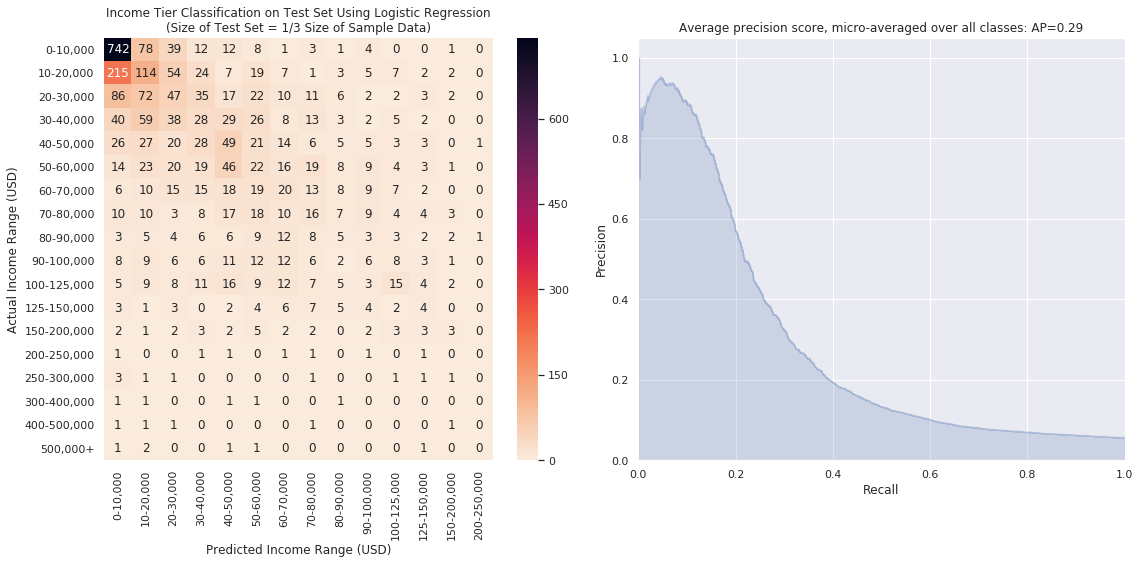

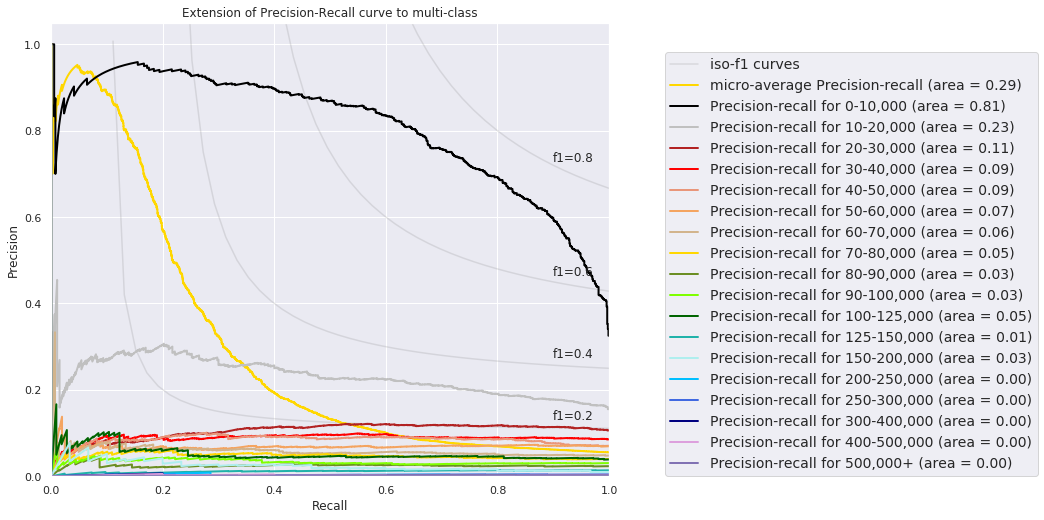

In [64]:
# 18 Income Categories - OUTSIDE US - WITHOUT regularization
log_reg = linear_model.LogisticRegression(random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_ex_us_scaled, y_ex_us)

In [65]:
log_reg_scores = cross_val_score(log_reg, X_ex_us_scaled, y_ex_us, cv=5)
print(log_reg_scores)

[0.364745 0.356826 0.356667 0.35317  0.325348]


In [66]:
avg = np.mean(log_reg_scores)
print(avg)

0.3513511610869547


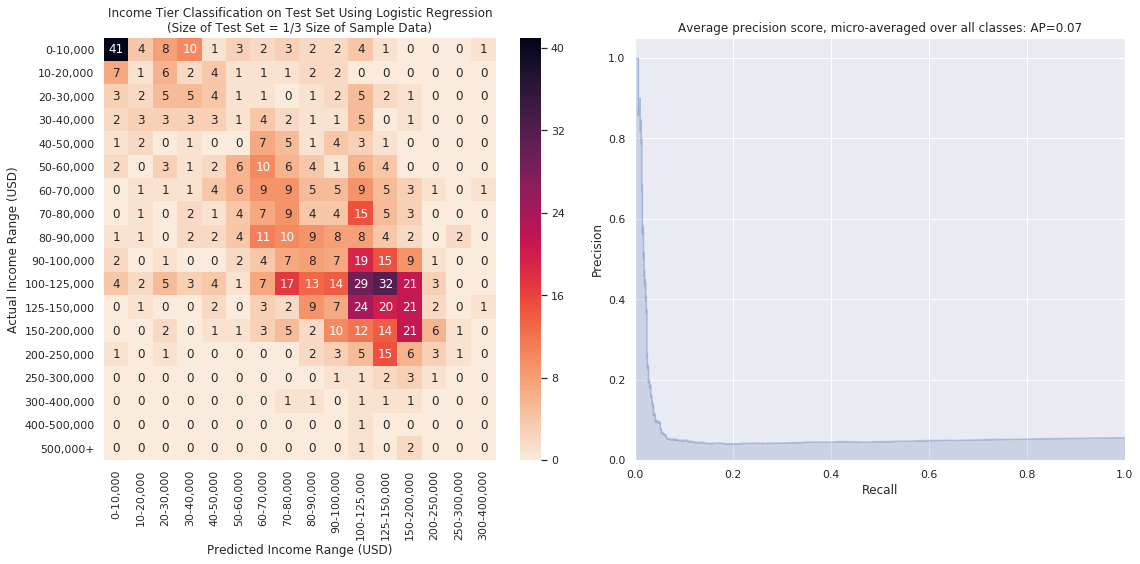

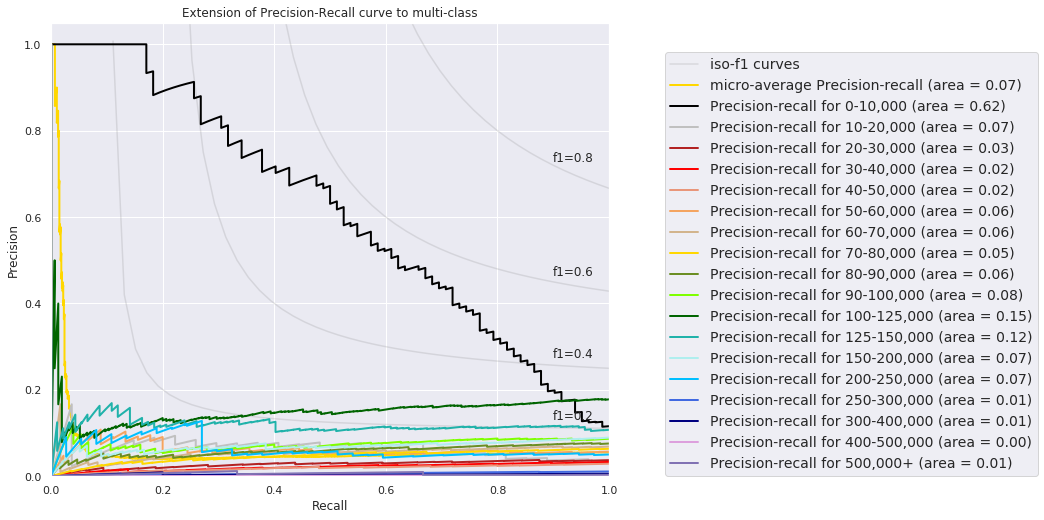

In [67]:
# 18 Income Categories - INSIDE US - WITHOUT regularization
log_reg = linear_model.LogisticRegression(random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_us_scaled, y_us)

In [68]:
log_reg_scores = cross_val_score(log_reg, X_us_scaled, y_us, cv=5)
print(log_reg_scores)

[0.188082 0.205273 0.187146 0.20381  0.212237]


In [69]:
avg = np.mean(log_reg_scores)
print(avg)

0.199309436304173


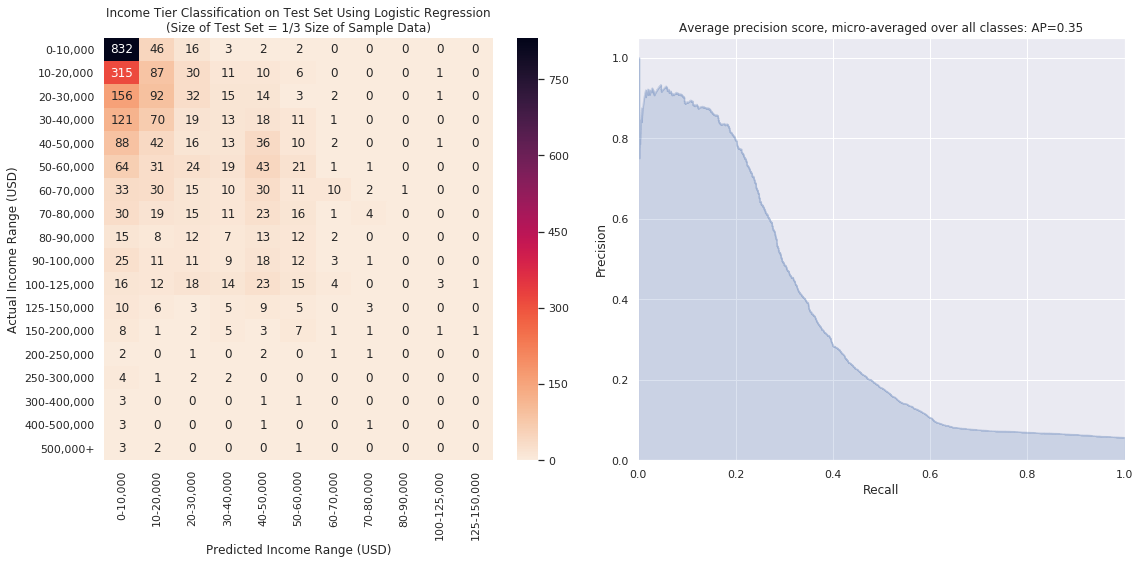

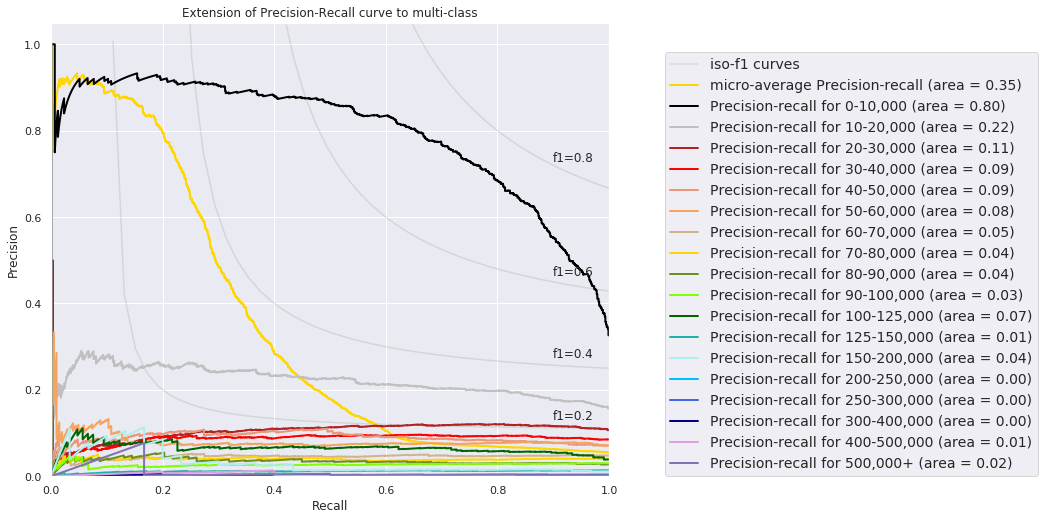

In [70]:
# 18 Income Categories - OUTSIDE US - WITH regularization
log_reg = linear_model.LogisticRegression(penalty='l2', tol=0.0001, 
                                          C=0.01, random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_ex_us_scaled, y_ex_us)

In [71]:
log_reg_scores = cross_val_score(log_reg, X_ex_us_scaled, y_ex_us, cv=5)
print(log_reg_scores)

[0.35255  0.346282 0.346111 0.35317  0.334262]


In [72]:
avg = np.mean(log_reg_scores)
print(avg)

0.3464749873550975


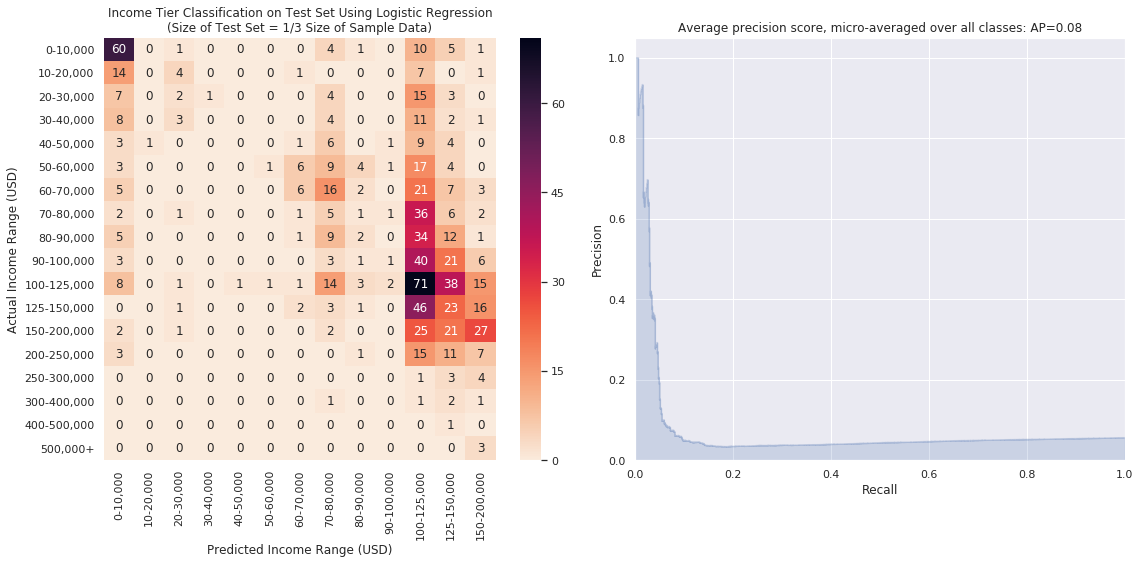

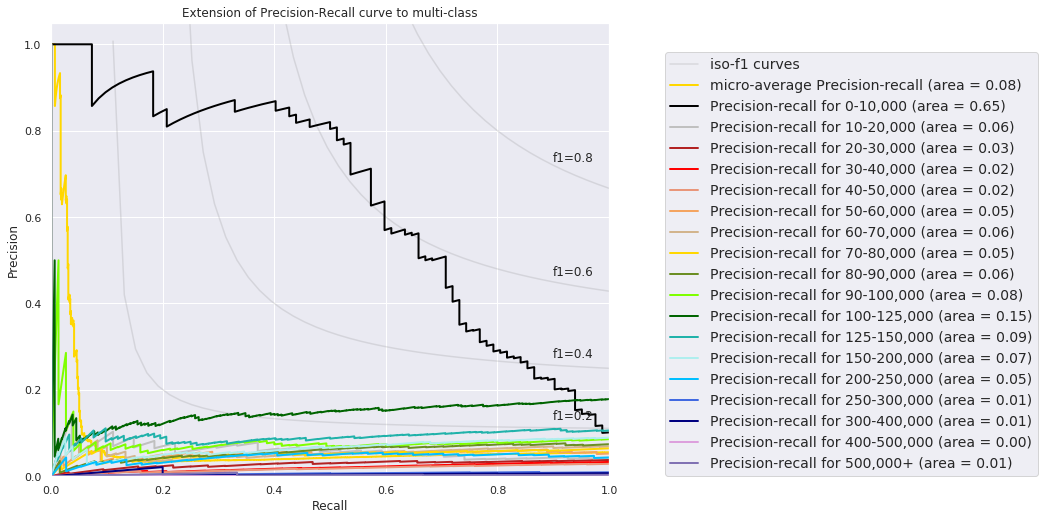

In [73]:
# 18 Income Categories - INSIDE US - WITH regularization
log_reg = linear_model.LogisticRegression(penalty='l2', tol=0.0001, 
                                          C=0.01, random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_us_scaled, y_us)

In [74]:
log_reg_scores = cross_val_score(log_reg, X_us_scaled, y_us, cv=5)
print(log_reg_scores)

[0.238361 0.227872 0.217391 0.251429 0.217973]


In [75]:
avg = np.mean(log_reg_scores)
print(avg)

0.23060526263290476


#### 9.1.2 Logistic Regression with 7 Income Categories

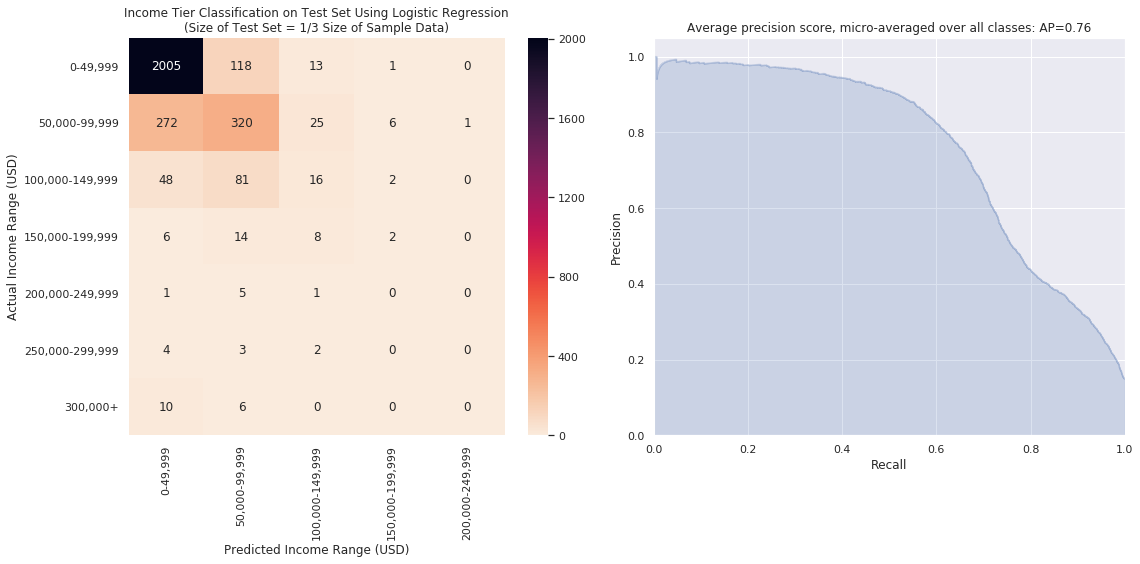

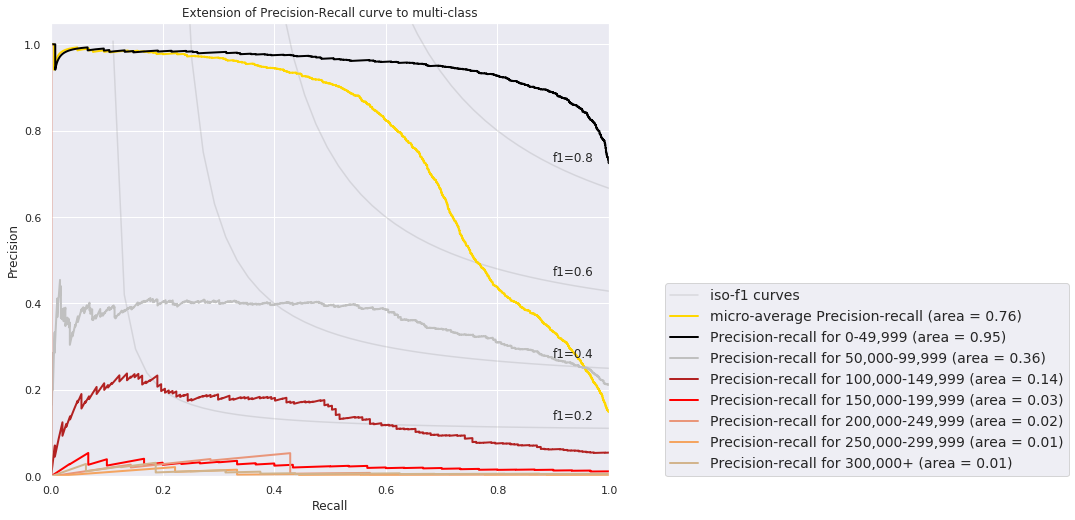

In [76]:
# 7 Income Categories - OUTSIDE US - WITHOUT regularization
log_reg = linear_model.LogisticRegression(random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_ex_us_scaled, y_ex_us_50k_groups)

In [77]:
log_reg_scores = cross_val_score(log_reg, X_ex_us_scaled, y_ex_us_50k_groups, cv=5)
print(log_reg_scores)

[0.795341 0.77     0.788889 0.767649 0.770173]


In [78]:
avg = np.mean(log_reg_scores)
print(avg)

0.7784102381031583


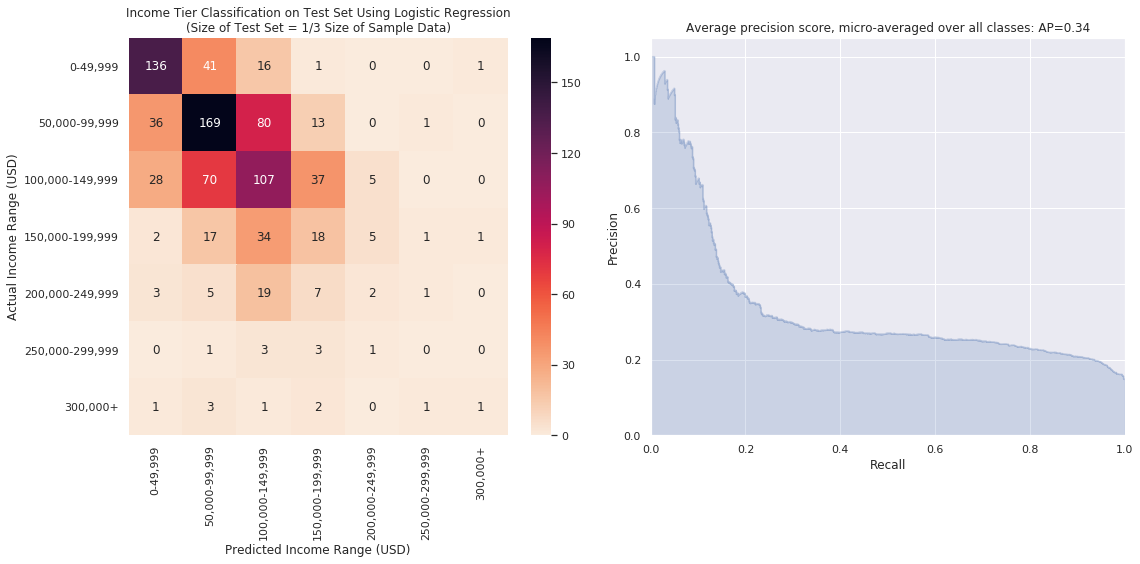

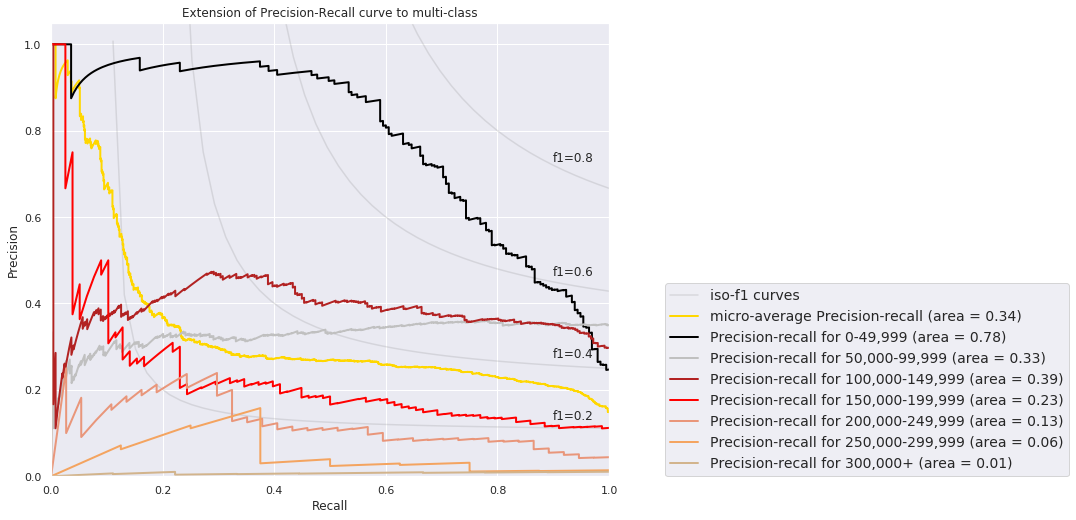

In [79]:
# 7 Income Categories - INSIDE US - WITHOUT regularization
log_reg = linear_model.LogisticRegression(random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_us_scaled, y_us_50k_groups)

In [80]:
log_reg_scores = cross_val_score(log_reg, X_us_scaled, y_us_50k_groups, cv=5)
print(log_reg_scores)

[0.483083 0.521739 0.506616 0.494318 0.497154]


In [81]:
avg = np.mean(log_reg_scores)
print(avg)

0.5005819952596964


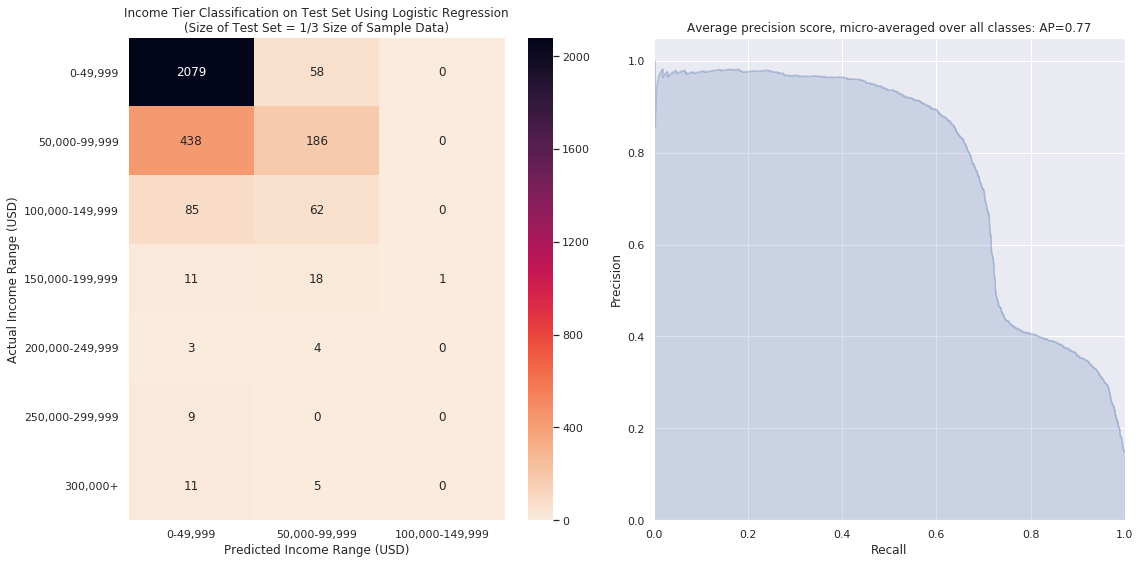

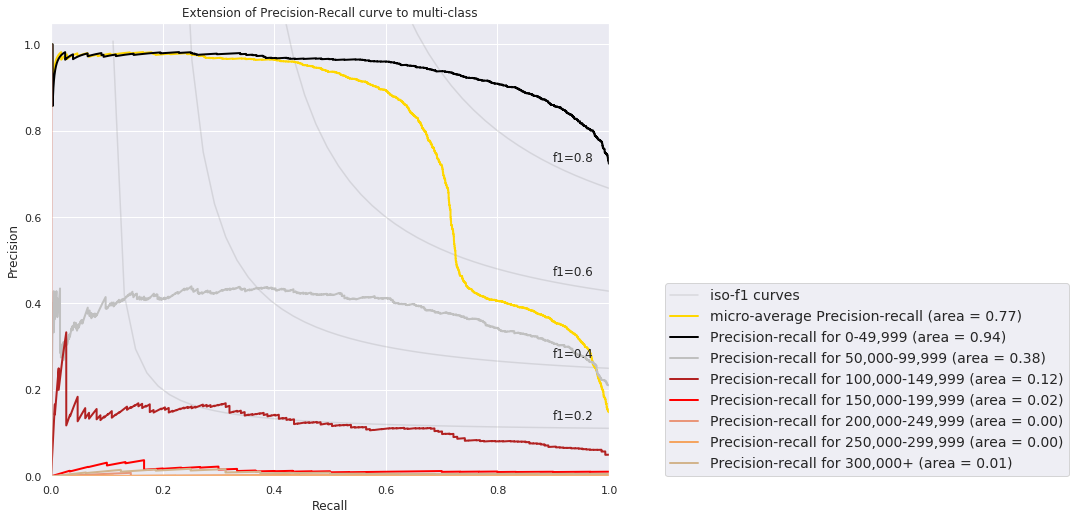

In [82]:
# 7 Income Categories - OUTSIDE US - WITH regularization
log_reg = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.01, random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_ex_us_scaled, y_ex_us_50k_groups)

In [83]:
log_reg_scores = cross_val_score(log_reg, X_ex_us_scaled, y_ex_us_50k_groups, cv=5)
print(log_reg_scores)

[0.757072 0.757222 0.768333 0.752084 0.777963]


In [84]:
avg = np.mean(log_reg_scores)
print(avg)

0.7625349732961646


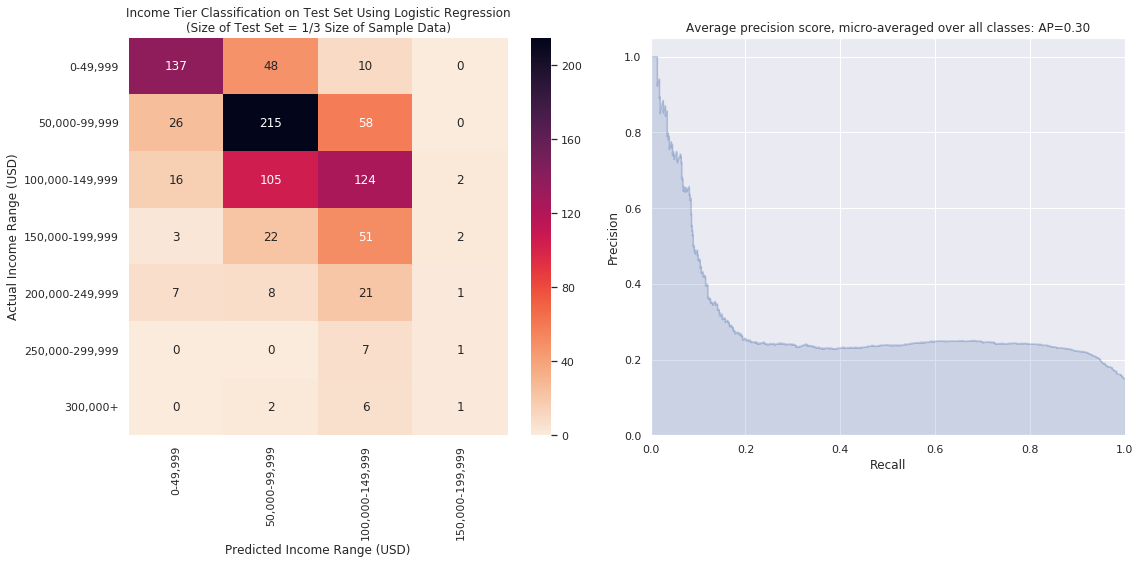

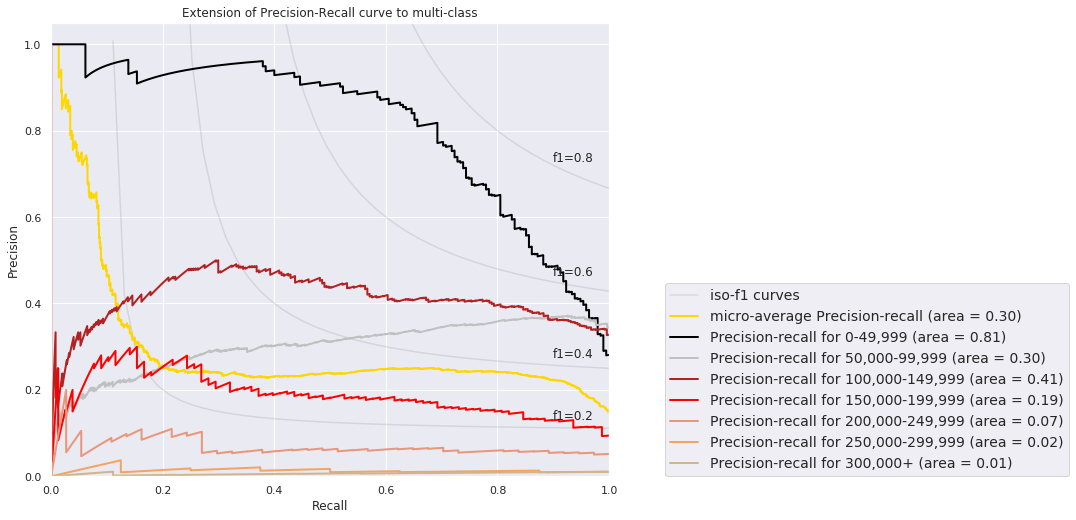

In [85]:
# 7 Income Categories - INSIDE US - WITH regularization
log_reg = linear_model.LogisticRegression(penalty='l2', tol=0.0001, C=0.01, random_state=101, multi_class='ovr')
run_log_reg(log_reg, X_us_scaled, y_us_50k_groups)

In [86]:
log_reg_scores = cross_val_score(log_reg, X_us_scaled, y_us_50k_groups, cv=5)
print(log_reg_scores)

[0.539474 0.538752 0.536862 0.541667 0.512334]


In [87]:
avg = np.mean(log_reg_scores)
print(avg)

0.5338177366902548


### 9.2 Random Forest

- A random forest model is an ensemble method comprised of the simultaneous, independent results from multiple decision trees
- Individual decision trees are likely to overfit on part of the data
- Overfitting can be reduced by averaging or taking the majority of the results from multiple decision trees
- Building a decision tree
    - Random bootstrap sampling from the original dataset (w/ replacement)
    - For each node in the tree:
        - Random subset of features
        - The algorithm looks for the best test from one of the features in a subset to determine how to split for deeper nodes
- Each decision tree is different
- When making classification predictions:
    - Each data point visits all trees in the ensemble / forest
    - Each tree makes ‘soft’ prediction of probability for each class
- Can be:
    - Used to determine feature importances
    - Computationally intensive
    - Parallelized across multiple CPUs
- Some hyperparameters that can be used:
    - Number of trees created, 
    - Max number of features to use in each node for splits,
        - High max number of features >> trees are more similar
        - Low max number of features >> trees are quite different
    - Max depth  
    - Max leaf nodes

#### 9.2.1 Random Forest with 18 Income Categories

In [88]:
# 18 Income Categories - OUTSIDE US
rfc1 = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=101)
scores1 = cross_val_score(rfc1, X_ex_us_scaled, y_ex_us, cv=5)
print(scores1)

[0.303215 0.303552 0.303889 0.304227 0.304735]


In [89]:
avg1 = np.mean(scores1)
print(avg1)

0.30392357413208365


In [90]:
# 18 Income Categories - OUTSIDE US
rfc2 = RandomForestClassifier(n_estimators=400, max_depth=3, random_state=101)
scores2 = cross_val_score(rfc2, X_ex_us_scaled, y_ex_us, cv=5)
print(scores2)

[0.303215 0.303552 0.303889 0.304227 0.304735]


In [91]:
avg2 = np.mean(scores2)
print(avg2)

0.30392357413208365


In [92]:
# 18 Income Categories - OUTSIDE US
rfc3 = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101)
scores3 = cross_val_score(rfc3, X_ex_us_scaled, y_ex_us, cv=5)
print(scores3)

[0.303215 0.303552 0.303889 0.304227 0.304735]


In [93]:
avg3 = np.mean(scores3)
print(avg3)

0.30392357413208365


In [94]:
# 18 Income Categories - INSIDE US
rfc4 = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=101)
scores4 = cross_val_score(rfc4, X_us_scaled, y_us, cv=5)
print(scores4)

[0.20298  0.207156 0.217391 0.209524 0.219885]


In [95]:
avg4 = np.mean(scores4)
print(avg4)

0.21138724315963828


In [96]:
# 18 Income Categories - INSIDE US
rfc5 = RandomForestClassifier(n_estimators=400, max_depth=3, random_state=101)
scores5 = cross_val_score(rfc5, X_us_scaled, y_us, cv=5)
print(scores5)

[0.210428 0.212806 0.217391 0.211429 0.229446]


In [97]:
avg5 = np.mean(scores5)
print(avg5)

0.2162999428468558


In [98]:
# 18 Income Categories - INSIDE US
rfc6 = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101)
scores6 = cross_val_score(rfc6, X_us_scaled, y_us, cv=5)
print(scores6)

[0.210428 0.212806 0.221172 0.213333 0.227533]


In [99]:
avg6 = np.mean(scores6)
print(avg6)

0.2170546297172847


#### 9.2.2 Random Forest with 7 Income Categories

In [100]:
# 7 Income Categories - OUTSIDE US
rfc7 = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=101)
scores7 = cross_val_score(rfc7, X_ex_us_scaled, y_ex_us_50k_groups, cv=5)
print(scores7)

[0.720466 0.721111 0.721111 0.721512 0.722315]


In [101]:
avg7 = np.mean(scores7)
print(avg7)

0.7213030065765239


In [102]:
# 7 Income Categories - OUTSIDE US
rfc8 = RandomForestClassifier(n_estimators=400, max_depth=3, random_state=101)
scores8 = cross_val_score(rfc8, X_ex_us_scaled, y_ex_us_50k_groups, cv=5)
print(scores8)

[0.720466 0.721111 0.721111 0.721512 0.722315]


In [103]:
avg8 = np.mean(scores8)
print(avg8)

0.7213030065765239


In [104]:
# 7 Income Categories - OUTSIDE US
rfc9 = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101)
scores9 = cross_val_score(rfc9, X_ex_us_scaled, y_ex_us_50k_groups, cv=5)
print(scores9)

[0.720466 0.721111 0.721111 0.721512 0.722315]


In [105]:
avg9 = np.mean(scores9)
print(avg9)

0.7213030065765239


In [106]:
# 7 Income Categories - INSIDE US
rfc10 = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=101)
scores10 = cross_val_score(rfc10, X_us_scaled, y_us_50k_groups, cv=5)
print(scores10)

[0.426692 0.466919 0.434783 0.44697  0.440228]


In [107]:
avg10 = np.mean(scores10)
print(avg10)

0.44311809070584857


In [108]:
# 7 Income Categories - INSIDE US
rfc11 = RandomForestClassifier(n_estimators=400, max_depth=3, random_state=101)
scores11 = cross_val_score(rfc11, X_us_scaled, y_us_50k_groups, cv=5)
print(scores11)

[0.483083 0.506616 0.499055 0.481061 0.470588]


In [109]:
avg11 = np.mean(scores11)
print(avg11)

0.4880805251252734


In [110]:
# 7 Income Categories - INSIDE US
rfc12 = RandomForestClassifier(n_estimators=300, max_depth=4, random_state=101)
scores12 = cross_val_score(rfc12, X_us_scaled, y_us_50k_groups, cv=5)
print(scores12)

[0.518797 0.52741  0.531191 0.507576 0.489564]


In [111]:
avg12 = np.mean(scores12)
print(avg12)

0.514907490326978


#### 9.2.3 Random Forest Feature Importances

In [112]:
# Feature Importances
rfc9.fit(X_ex_us_scaled, y_ex_us_50k_groups)
feats = {'index': [], 'feat_name': [], 'val': []}
for i, val in enumerate(rfc9.feature_importances_):
    feats['index'].append(i)
    feats['feat_name'].append(X_ex_us_scaled.columns[i])
    feats['val'].append(val)

feats = pd.DataFrame(feats)
feats.sort_values(by='val', ascending=False).head(25)

index                                          feat_name       val
332    332             Q2 - What is your age (# years)?_22-24  0.055414
452    452  Q7 - In what industry is your current employer...  0.054387
444    444  Q6 - Select the title most similar to your cur...  0.051931
364    364  Q3 - In which country do you currently reside?...  0.051581
569    569  Q24 - How long have you been writing code to a...  0.042144
563    563  Q24 - How long have you been writing code to a...  0.041300
16      16  Q11_Part_4 - Select any activities that make u...  0.034436
568    568  Q24 - How long have you been writing code to a...  0.032641
331    331             Q2 - What is your age (# years)?_18-21  0.031463
350    350  Q3 - In which country do you currently reside?...  0.029606
359    359  Q3 - In which country do you currently reside?...  0.029282
103    103  Q27_Part_1 - Which of the following cloud comp...  0.024636
580    580  Q25 - For how many years have you used machine...  0.021368
47      47  Q15_Part_2 - Which of the following cloud comp...  0.020889
336    336             Q2 - What is your age (# years)?_40-44  0.014906
9        9  Q35_Part_3 - What percentage of your current m...  0.014836
344    344  Q3 - In which country do you currently reside?...  0.014475
335    335             Q2 - What is your age (# years)?_35-39  0.014180
562    562  Q24 - How long have you been writing code to a...  0.013403
13      13  Q11_Part_1 - Select any activities that make u...  0.012646
430    430  Q6 - Select the title most similar to your cur...  0.012486
275    275  Q42_Part_1 - What metrics do you or your organ...  0.012416
579    579  Q25 - For how many years have you used machine...  0.011088
337    337             Q2 - What is your age (# years)?_45-49  0.010801
627    627  Q39_Part_2 - How do you perceive the quality o...  0.009323

In [113]:
# Feature Importances
rfc12.fit(X_us_scaled, y_us_50k_groups)
feats = {'index': [], 'feat_name': [], 'val': []}
for i, val in enumerate(rfc12.feature_importances_):
    feats['index'].append(i)
    feats['feat_name'].append(X_us_scaled.columns[i])
    feats['val'].append(val)

feats = pd.DataFrame(feats)
feats.sort_values(by='val', ascending=False).head(25)

index                                          feat_name       val
444    444  Q6 - Select the title most similar to your cur...  0.095921
452    452  Q7 - In what industry is your current employer...  0.081799
275    275  Q42_Part_1 - What metrics do you or your organ...  0.038895
331    331             Q2 - What is your age (# years)?_18-21  0.033754
332    332             Q2 - What is your age (# years)?_22-24  0.032511
16      16  Q11_Part_4 - Select any activities that make u...  0.028005
563    563  Q24 - How long have you been writing code to a...  0.023061
430    430  Q6 - Select the title most similar to your cur...  0.021544
439    439  Q6 - Select the title most similar to your cur...  0.021157
481    481  Q10 - Does your current employer incorporate m...  0.021006
427    427  Q6 - Select the title most similar to your cur...  0.020531
13      13  Q11_Part_1 - Select any activities that make u...  0.018384
9        9  Q35_Part_3 - What percentage of your current m...  0.017121
14      14  Q11_Part_2 - Select any activities that make u...  0.016398
477    477  Q10 - Does your current employer incorporate m...  0.016077
585    585  Q26 - Do you consider yourself to be a data sc...  0.014462
61      61  Q16_Part_9 - What programming languages do you...  0.014390
55      55  Q16_Part_3 - What programming languages do you...  0.013674
445    445  Q7 - In what industry is your current employer...  0.013103
47      47  Q15_Part_2 - Which of the following cloud comp...  0.011902
103    103  Q27_Part_1 - Which of the following cloud comp...  0.011383
569    569  Q24 - How long have you been writing code to a...  0.011167
478    478  Q10 - Does your current employer incorporate m...  0.010672
51      51  Q15_Part_6 - Which of the following cloud comp...  0.009718
10      10  Q35_Part_4 - What percentage of your current m...  0.009644

### 9.3 Gradient Boosting

- A gradient boosting model is an ensemble method where each model in a sequence of models learns from the mistakes of previous models in the sequence
- Observations for successive model training are based on errors instead of bootstrap sampling
- Some hyperparameters used for tuning
    - Number of trees created
    - Max depth
    - Learning rate
- Susceptible to overfitting
- Stopping rule
    - Number of models ran
    - Variance threshold
    - Change in weights threshold

#### 9.3.1 Gradient Boosting with 18 Income Categories

In [114]:
# 18 Income Categories - OUTSIDE US
X, y = X_ex_us_scaled, y_ex_us
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gbc1 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                 max_depth=2, random_state=101).fit(X_train, y_train)
gbc1.score(X_test, y_test)

0.36936026936026933

In [115]:
scores1 = cross_val_score(gbc1, X, y, cv=5)
print(scores1)

[0.383592 0.3596   0.372778 0.374305 0.345961]


In [116]:
avg1 = np.mean(scores1)
print(avg1)

0.36724720506902847


In [117]:
# 18 Income Categories - INSIDE US
X, y = X_us_scaled, y_us
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gbc2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                 max_depth=2, random_state=101).fit(X_train, y_train)
gbc2.score(X_test, y_test)

0.2290950744558992

In [118]:
scores2 = cross_val_score(gbc2, X, y, cv=5)
print(scores2)

[0.234637 0.224105 0.221172 0.238095 0.221797]


In [119]:
avg2 = np.mean(scores2)
print(avg2)

0.22796138336345603


#### 9.3.2 Gradient Boosting with 7 Income Categories

In [120]:
# 7 Income Categories - OUTSIDE US
X, y = X_ex_us_scaled, y_ex_us_50k_groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gbc3 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                 max_depth=2, random_state=101).fit(X_train, y_train)
gbc3.score(X_test, y_test)

0.7888888888888889

In [121]:
scores3 = cross_val_score(gbc3, X, y, cv=5)
print(scores3)

[0.79756  0.777778 0.789444 0.782101 0.794658]


In [122]:
avg3 = np.mean(scores3)
print(avg3)

0.7883081550652864


In [123]:
# 7 Income Categories - INSIDE US
X, y = X_us_scaled, y_us_50k_groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gbc4 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1,
                                 max_depth=2, random_state=101).fit(X_train, y_train)
gbc4.score(X_test, y_test)

0.5257731958762887

In [124]:
scores4 = cross_val_score(gbc4, X, y, cv=5)
print(scores4)

[0.526316 0.567108 0.534972 0.545455 0.523719]


In [125]:
avg4 = np.mean(scores4)
print(avg4)

0.5395137790197368


### 9.4 Neural Network

- Input layer of features
- Hidden layers (1 or more)
    - Multiple perceptrons in each hidden layer
    - Activation function for a perceptron allows for a binary or continuous output (relu, sigmoid, tanh)
- Each feature from input layer connected to each perceptron in the 1st hidden layer with different weightings
- Each perceptron in each hidden layer is connected to other perceptrons in the next hidden layer OR the output layer with different weightings
- Output layer

In [126]:
feats_df_for_nn_no_nulls_us.shape

(2645, 357)

In [127]:
df_us = feats_df_for_nn_no_nulls_us.copy()
dep_var = 'Q9 - What is your current yearly compensation (approximate $USD)?'
path = '/home/dj/PycharmProjects/coursework/venv/coursework/thinkful/data_science/files/unit_3/kaggle-survey-2018/'
procs = [FillMissing, Categorify, Normalize]
valid_idx_us = range(len(df_us)-2116, len(df_us))

In [128]:
cat_names_us = [x for x in df_us.columns if not x.startswith('Q34') and not x.startswith('Q35')]

In [129]:
feats_df_for_nn_no_nulls_ex_us.shape

(8999, 357)

In [130]:
df_ex_us = feats_df_for_nn_no_nulls_ex_us.copy()
dep_var = 'Q9 - What is your current yearly compensation (approximate $USD)?'
path = '/home/dj/PycharmProjects/coursework/venv/coursework/thinkful/data_science/files/unit_3/kaggle-survey-2018/'
procs = [FillMissing, Categorify, Normalize]
valid_idx_ex_us = range(len(df_ex_us)-7200, len(df_ex_us))

In [131]:
cat_names_ex_us = [x for x in df_ex_us.columns if not x.startswith('Q34') and not x.startswith('Q35')]

#### 9.4.1 Neural Network with 18 Income Categories

In [132]:
# 18 Income Categories - INSIDE US
data = TabularDataBunch.from_df(path, df_us, dep_var, valid_idx=valid_idx_us, procs=procs, cat_names=cat_names_us)

In [133]:
learn1 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn1.fit_one_cycle(10, 1e-2)

In [134]:
learn2 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn2.fit_one_cycle(10, 5e-2)

In [135]:
learn3 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn3.fit_one_cycle(10, 1e-1)

In [136]:
# 18 Income Categories - OUTSIDE US
data = TabularDataBunch.from_df(path, df_ex_us, dep_var, valid_idx=valid_idx_ex_us, procs=procs, cat_names=cat_names_ex_us)

In [137]:
learn4 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn4.fit_one_cycle(10, 1e-2)

In [138]:
learn5 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn5.fit_one_cycle(10, 5e-2)

In [139]:
learn6 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn6.fit_one_cycle(10, 1e-1)

#### 9.4.2 Neural Network with 7 Income Categories

In [140]:
# 7 Income Categories - INSIDE US
df_us[dep_var] = df_us[dep_var].replace(to_replace=salary_tiers)  # Reduce number of income categories from 18 to 7
data = TabularDataBunch.from_df(path, df_us, dep_var, valid_idx=valid_idx_us, procs=procs, cat_names=cat_names_us)

In [141]:
learn7 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn7.fit_one_cycle(10, 1e-2)

In [142]:
learn8 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn8.fit_one_cycle(10, 5e-2)

In [143]:
learn9 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn9.fit_one_cycle(10, 1e-1)

In [144]:
# 7 Income Categories - OUTSIDE US
df_ex_us[dep_var] = df_ex_us[dep_var].replace(to_replace=salary_tiers)  # Reduce number of income categories from 18 to 7
data = TabularDataBunch.from_df(path, df_ex_us, dep_var, valid_idx=valid_idx_ex_us, procs=procs, cat_names=cat_names_ex_us)

In [145]:
learn10 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn10.fit_one_cycle(10, 1e-2)

In [146]:
learn11 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn11.fit_one_cycle(10, 5e-2)

In [147]:
learn12 = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn12.fit_one_cycle(10, 1e-1)

__________________________________
## 10. Summary

- Some themes in the data:
    - Youth
    - Python ecosystem
    - Possible disruption in education
- Supervised Learning – Predicting Income Tiers Inside / Outside US
    - Logistic Regression – Better than RF (7 Tiers – Outside US)
    - Random Forest – Better than LR (7 Tiers - Inside US) 
    - Gradient Boosting – Better than LR & RF
    - Neural Net – Best